In [1]:
# Importing necessaries libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

file_path = 'Analysis/agriculture_data.csv'
agriculture_data = pd.read_csv(file_path)

# Federico Ariton
### Master in Data Analytics
### CA 2 Integrated
### Student Number:sba22090

In [2]:
agriculture_data

Year                      Area                      Item  \
0     2000                 Argentina                    Barley   
1     2000                 Argentina          Cereals, primary   
2     2000                 Argentina  Hen eggs in shell, fresh   
3     2000                 Argentina               Meat, Total   
4     2000                 Argentina               Milk, Total   
...    ...                       ...                       ...   
3537  2022  United States of America  Hen eggs in shell, fresh   
3538  2022  United States of America               Meat, Total   
3539  2022  United States of America               Milk, Total   
3540  2022  United States of America        Raw milk of cattle   
3541  2022  United States of America                     Wheat   

      Production Value (t)  Export Quantity (t)  Export Value (1000 USD)  \
0             7.224900e+05             36926.56                  4991.00   
1             3.798392e+07          22932025.00               2336236.82   
2             6.165055e+06                29.85                    74.00   
3             4.101293e+06             39348.35                 81699.69   
4             1.012133e+07            985564.44                251620.40   
...                    ...                  ...                      ...   
3537          1.160425e+08            106461.08                542022.00   
3538          4.753073e+07            700746.53               1790984.11   
3539          1.027473e+08           7504596.45               4064699.76   
3540          1.027216e+08            112499.88                111081.00   
3541          4.490232e+07          20917589.34               8522976.00   

      Import Quantity (t)  Import Value (1000 USD)  GPV (1000 USD)  \
0                16563.52                  2718.00         70117.0   
1                28333.11                 19182.04       3522037.0   
2                 2394.27                  4389.00        243361.0   
3                 9885.38                 11174.63       6505490.0   
4                 4736.50                  2499.45       1569591.0   
...                   ...                      ...             ...   
3537              9523.35                 79327.00      20341512.0   
3538            165228.41               1004497.75     125670152.0   
3539            576391.22               1085002.56      57498702.0   
3540             18179.09                 18303.00      57498702.0   
3541           1677097.86                710962.00      14849018.0   

      GPV_Const (1000 USD)  Producer Price (USD/tonne)  
0                  96771.0                       97.00  
1                6251729.0                       95.19  
2                 369664.0                      744.40  
3               18148194.0                     1354.26  
4                3467487.0                      155.10  
...                    ...                         ...  
3537            11224422.0                     3115.90  
3538           128428194.0                     2198.73  
3539            43485459.0                      559.80  
3540            43485459.0                      559.80  
3541             8127320.0                      330.70  

[3542 rows x 11 columns]

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [7]:
agriculture_data.describe()

Year  Production Value (t)  Export Quantity (t)  \
count 3542.00               3542.00              3542.00   
mean  2011.00           26480390.16           2835732.39   
std      6.63           72181300.26           8811568.87   
min   2000.00                  0.00                 0.00   
25%   2005.00            2134411.32             32728.37   
50%   2011.00            6223830.50            207479.48   
75%   2017.00           17755369.75           1132040.66   
max   2022.00          635092927.32         102646398.07   

       Export Value (1000 USD)  Import Quantity (t)  Import Value (1000 USD)  \
count                  3542.00              3542.00                  3542.00   
mean                 799188.67           1181772.19                386610.27   
std                 2115047.91           3015233.21                909036.92   
min                       0.00                 0.00                     0.00   
25%                   25226.00             13585.74                 14305.25   
50%                  143636.10            129285.55                 77974.00   
75%                  484711.50            723089.20                339703.75   
max                30248305.78          66054620.80              19581582.46   

       GPV (1000 USD)  GPV_Const (1000 USD)  Producer Price (USD/tonne)  
count         3542.00               3542.00                     3542.00  
mean      10104651.08           11406465.96                      642.64  
std       28320008.11           30650197.38                      725.01  
min          25150.00              34391.00                       67.35  
25%         913479.25             816187.25                      209.55  
50%        2338953.00            3054524.00                      335.10  
75%        9160853.75           10573609.00                      643.58  
max      398512081.00          308529712.00                     4042.28

In [4]:
unique_areas = agriculture_data['Area'].unique()
unique_items = agriculture_data['Item'].unique()
unique_areas, unique_items

(array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
        'China', 'Denmark', 'Finland', 'France', 'Germany', 'Hungary',
        'India', 'Ireland', 'Italy', 'Netherlands (Kingdom of the)',
        'New Zealand', 'Poland', 'Romania', 'Spain', 'Sweden',
        'United States of America'], dtype=object),
 array(['Barley', 'Cereals, primary', 'Hen eggs in shell, fresh',
        'Meat, Total', 'Milk, Total', 'Raw milk of cattle', 'Wheat'],
       dtype=object))

In [5]:
# Filter the dataset to include only Ireland's data
ireland_data = agriculture_data[agriculture_data['Area'] == 'Ireland']

# Summarize Ireland's data by year and product
ireland_summary = ireland_data.groupby(['Year', 'Item']).agg({
    'Production Value (t)': 'sum',
    'Export Quantity (t)': 'sum',
    'Export Value (1000 USD)': 'sum',
    'Import Quantity (t)': 'sum',
    'Import Value (1000 USD)': 'sum',
    'GPV (1000 USD)': 'sum',
    'Producer Price (USD/tonne)': 'mean'
}).reset_index()

# Display a portion of the summarized data
ireland_summary.head()

Year                      Item  Production Value (t)  Export Quantity (t)  \
0  2000                    Barley            1309900.00            125418.00   
1  2000          Cereals, primary            2177490.65            181183.00   
2  2000  Hen eggs in shell, fresh             597376.00               611.00   
3  2000               Meat, Total            1016480.00             75544.92   
4  2000               Milk, Total            5159788.00           2247281.67   

   Export Value (1000 USD)  Import Quantity (t)  Import Value (1000 USD)  \
0                 16853.00             11884.00                  2050.00   
1                 25076.06            596878.00                 85497.73   
2                   627.00              1840.00                  2477.00   
3                146760.79             12511.56                 23032.42   
4                719614.78            440080.70                135644.29   

   GPV (1000 USD)  Producer Price (USD/tonne)  
0        122589.0                       93.60  
1        205075.0                       95.17  
2         26061.0                      804.90  
3       2147477.0                     1066.30  
4       1291725.0                      250.30

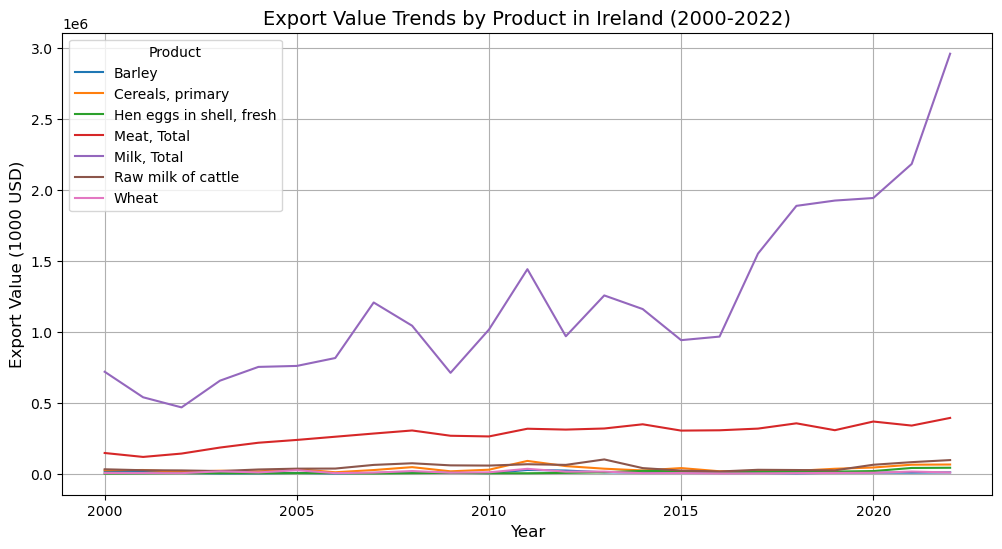

In [7]:
# Select relevant columns for export trends in Ireland
ireland_exports = ireland_summary.groupby(['Year', 'Item']).agg({
    'Export Quantity (t)': 'sum',
    'Export Value (1000 USD)': 'sum'
}).reset_index()

# Plot trends for Export Quantity
plt.figure(figsize=(12, 6))
for item in ireland_exports['Item'].unique():
    subset = ireland_exports[ireland_exports['Item'] == item]
    plt.plot(subset['Year'], subset['Export Quantity (t)'], label=item)

plt.title('Export Quantity Trends by Product in Ireland (2000-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Export Quantity (t)', fontsize=12)
plt.legend(title="Product", fontsize=10)
plt.grid()
plt.show()

# Plot trends for Export Value
plt.figure(figsize=(12, 6))
for item in ireland_exports['Item'].unique():
    subset = ireland_exports[ireland_exports['Item'] == item]
    plt.plot(subset['Year'], subset['Export Value (1000 USD)'], label=item)

plt.title('Export Value Trends by Product in Ireland (2000-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Export Value (1000 USD)', fontsize=12)
plt.legend(title="Product", fontsize=10)
plt.grid()
plt.show()

In [8]:
# Filter out 'Milk, Total' to focus on other products
ireland_exports_filtered = ireland_exports[ireland_exports['Item'] != 'Milk, Total']

# Plot trends for Export Quantity (Excluding Milk) with adjusted scale
plt.figure(figsize=(12, 6))
for item in ireland_exports_filtered['Item'].unique():
    subset = ireland_exports_filtered[ireland_exports_filtered['Item'] == item]
    plt.plot(subset['Year'], subset['Export Quantity (t)'], label=item)

plt.title('Export Quantity Trends by Product in Ireland (Excluding Milk)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Export Quantity (t)', fontsize=12)
plt.legend(title="Product", fontsize=10)
plt.grid()
plt.yscale('log')  # Change scale to logarithmic for better visibility
plt.show()

# Plot trends for Export Value (Excluding Milk) with adjusted scale
plt.figure(figsize=(12, 6))
for item in ireland_exports_filtered['Item'].unique():
    subset = ireland_exports_filtered[ireland_exports_filtered['Item'] == item]
    plt.plot(subset['Year'], subset['Export Value (1000 USD)'], label=item)

plt.title('Export Value Trends by Product in Ireland (Excluding Milk)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Export Value (1000 USD)', fontsize=12)
plt.legend(title="Product", fontsize=10)
plt.grid()
plt.yscale('log')  # Change scale to logarithmic for better visibility
plt.show()


In [9]:
# Plot trends for Production Quantity by Product in Ireland
plt.figure(figsize=(12, 6))
for item in ireland_summary['Item'].unique():
    subset = ireland_summary[ireland_summary['Item'] == item]
    plt.plot(subset['Year'], subset['Production Value (t)'], label=item)

plt.title('Production Trends by Product in Ireland (2000-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Production Value (t)', fontsize=12)
plt.legend(title="Product", fontsize=10)
plt.grid()
plt.yscale('log')  # Logarithmic scale for better visibility of differences
plt.show()

In [10]:
# Check if 'Hen eggs in shell, fresh' has any zero values in relevant columns
hen_eggs_data = ireland_summary[ireland_summary['Item'] == 'Hen eggs in shell, fresh']

zero_values_check = hen_eggs_data[
    (hen_eggs_data['Production Value (t)'] == 0) |
    (hen_eggs_data['Export Quantity (t)'] == 0) |
    (hen_eggs_data['Export Value (1000 USD)'] == 0)
]

zero_values_check

Year                      Item  Production Value (t)  \
128  2018  Hen eggs in shell, fresh                  0.00   
135  2019  Hen eggs in shell, fresh                  0.00   

     Export Quantity (t)  Export Value (1000 USD)  Import Quantity (t)  \
128              5714.24                 13312.00              1537.62   
135              7432.49                 15689.00              1856.46   

     Import Value (1000 USD)  GPV (1000 USD)  Producer Price (USD/tonne)  
128                  3933.00     15304197.47                      335.10  
135                  4345.00     17211728.76                      335.10

In [11]:
# Replace zero values contextually (grouping by 'Year' and 'Area')
# Defining columns that are relevant for replacement
columns_to_replace = [
    "Production Value (t)", 
    "Export Quantity (t)", 
    "Export Value (1000 USD)", 
    "Import Quantity (t)", 
    "Import Value (1000 USD)", 
    "GPV (1000 USD)", 
    "GPV_Const (1000 USD)", 
    "Producer Price (USD/tonne)"
]

# Replace zeros with the median value grouped by 'Year' and 'Area'
agriculture_data_replaced = agriculture_data.copy()

for column in columns_to_replace:
    agriculture_data_replaced[column] = agriculture_data_replaced.groupby(['Year', 'Area'])[column]\
        .transform(lambda x: x.replace(0, x.median()))

# Check the dataset after replacement
agriculture_data_replaced.head()

Year       Area                      Item  Production Value (t)  \
0  2000  Argentina                    Barley             722490.00   
1  2000  Argentina          Cereals, primary           37983923.00   
2  2000  Argentina  Hen eggs in shell, fresh            6165055.00   
3  2000  Argentina               Meat, Total            4101293.00   
4  2000  Argentina               Milk, Total           10121330.00   

   Export Quantity (t)  Export Value (1000 USD)  Import Quantity (t)  \
0             36926.56                  4991.00             16563.52   
1          22932025.00               2336236.82             28333.11   
2                29.85                    74.00              2394.27   
3             39348.35                 81699.69              9885.38   
4            985564.44                251620.40              4736.50   

   Import Value (1000 USD)  GPV (1000 USD)  GPV_Const (1000 USD)  \
0                  2718.00        70117.00              96771.00   
1                 19182.04      3522037.00            6251729.00   
2                  4389.00       243361.00             369664.00   
3                 11174.63      6505490.00           18148194.00   
4                  2499.45      1569591.00            3467487.00   

   Producer Price (USD/tonne)  
0                       97.00  
1                       95.19  
2                      744.40  
3                     1354.26  
4                      155.10

In [12]:
agriculture_data_replaced.to_csv('Analysis/agriculture_data_replaced.csv', index=False)

In [13]:
# Filter the data for Ireland
ireland_data = agriculture_data_replaced[agriculture_data_replaced['Area'] == 'Ireland']

# Group the data by Year and Item for summary
ireland_summary = ireland_data.groupby(['Year', 'Item'], as_index=False)['Production Value (t)'].sum()

# Plot trends for Production Quantity by Product in Ireland
plt.figure(figsize=(12, 6))
for item in ireland_summary['Item'].unique():
    subset = ireland_summary[ireland_summary['Item'] == item]
    plt.plot(subset['Year'], subset['Production Value (t)'], label=item)

plt.title('Production Trends by Product in Ireland (2000-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Production Value (t)', fontsize=12)
plt.legend(title="Product", fontsize=10)
plt.grid()
plt.yscale('log')  # Logarithmic scale for better visibility of differences
plt.show()


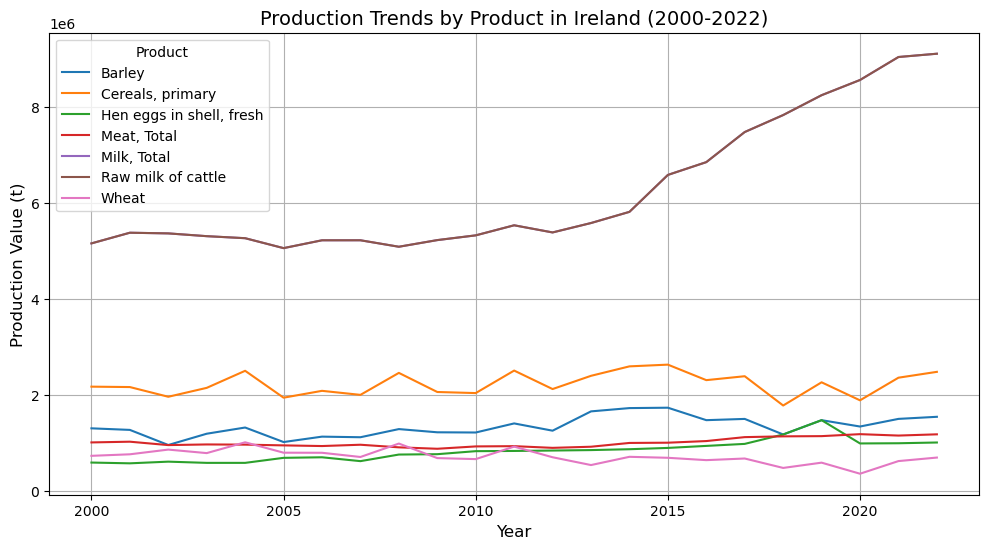

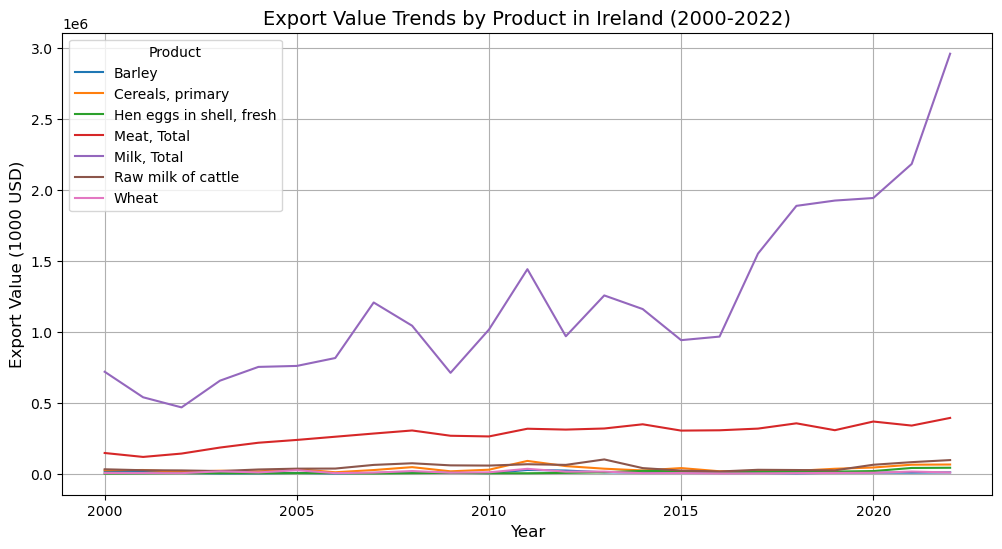

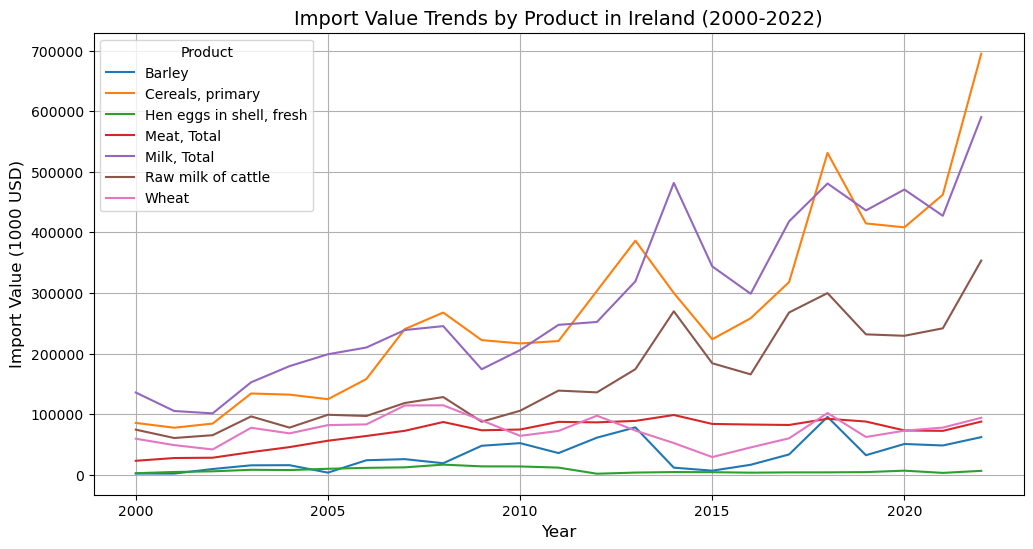

In [14]:
# Filter data for Ireland
ireland_data = agriculture_data_replaced[agriculture_data_replaced['Area'] == 'Ireland']

# Summarize trends for Ireland
ireland_summary = ireland_data.groupby(['Year', 'Item'], as_index=False).agg({
    'Production Value (t)': 'sum',
    'Export Value (1000 USD)': 'sum',
    'Import Value (1000 USD)': 'sum'
})

# Plot production trends for Ireland
plt.figure(figsize=(12, 6))
for item in ireland_summary['Item'].unique():
    subset = ireland_summary[ireland_summary['Item'] == item]
    plt.plot(subset['Year'], subset['Production Value (t)'], label=item)

plt.title('Production Trends by Product in Ireland (2000-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Production Value (t)', fontsize=12)
plt.legend(title="Product", fontsize=10)
plt.grid()
plt.show()

# Plot export trends for Ireland
plt.figure(figsize=(12, 6))
for item in ireland_summary['Item'].unique():
    subset = ireland_summary[ireland_summary['Item'] == item]
    plt.plot(subset['Year'], subset['Export Value (1000 USD)'], label=item)

plt.title('Export Value Trends by Product in Ireland (2000-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Export Value (1000 USD)', fontsize=12)
plt.legend(title="Product", fontsize=10)
plt.grid()
plt.show()

# Plot import trends for Ireland
plt.figure(figsize=(12, 6))
for item in ireland_summary['Item'].unique():
    subset = ireland_summary[ireland_summary['Item'] == item]
    plt.plot(subset['Year'], subset['Import Value (1000 USD)'], label=item)

plt.title('Import Value Trends by Product in Ireland (2000-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Import Value (1000 USD)', fontsize=12)
plt.legend(title="Product", fontsize=10)
plt.grid()
plt.show()

In [15]:
import plotly.express as px

# Prepare data for mapping
map_summary = agriculture_data_replaced.groupby(['Year', 'Area'], as_index=False).agg({
    'Production Value (t)': 'sum',
    'Export Value (1000 USD)': 'sum',
    'Import Value (1000 USD)': 'sum'
})


# Production Map with Larger Size
fig_production = px.choropleth(
    map_summary,
    locations='Area',
    locationmode='country names',
    color='Production Value (t)',
    hover_name='Area',
    animation_frame='Year',  # Add a slider for years
    title='Production Trends by Country (2000-2022)',
    color_continuous_scale=px.colors.sequential.Plasma
)

# Update layout for a larger map
fig_production.update_layout(
    width=1200,  # Set the width of the map
    height=800,  # Set the height of the map
    title_font_size=18
)

# Adjust the geographical projection and display
fig_production.update_geos(
    showcoastlines=True,
    projection_type="natural earth",
    fitbounds="locations"  # Ensures the map is centered around the data
)

fig_production.show()


In [16]:
# Export Map with Larger Size
fig_export = px.choropleth(
    map_summary,
    locations='Area',
    locationmode='country names',
    color='Export Value (1000 USD)',
    hover_name='Area',
    animation_frame='Year',  # Add a slider for years
    title='Export Trends by Country (2000-2022)',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig_export.update_layout(
    width=1200,  # Set the width of the map
    height=800,  # Set the height of the map
    title_font_size=18
)

fig_export.update_geos(
    showcoastlines=True,
    projection_type="natural earth",
    fitbounds="locations"
)

fig_export.show()

In [17]:
# Import Map with Larger Size
fig_import = px.choropleth(
    map_summary,
    locations='Area',
    locationmode='country names',
    color='Import Value (1000 USD)',
    hover_name='Area',
    animation_frame='Year',  # Add a slider for years
    title='Import Trends by Country (2000-2022)',
    color_continuous_scale=px.colors.sequential.Cividis
)

fig_import.update_layout(
    width=1200,  # Set the width of the map
    height=800,  # Set the height of the map
    title_font_size=18
)

fig_import.update_geos(
    showcoastlines=True,
    projection_type="natural earth",
    fitbounds="locations"
)

fig_import.show()


In [18]:
agriculture_data = agriculture_data_replaced

# Hypotheses for Analysis

### Hypothesis 1: Export and Import Values

Null Hypothesis (H₀): There is no significant difference between export and import values for a specific country or item.
Alternative Hypothesis (H₁): There is a significant difference between export and import values for a specific country or item.

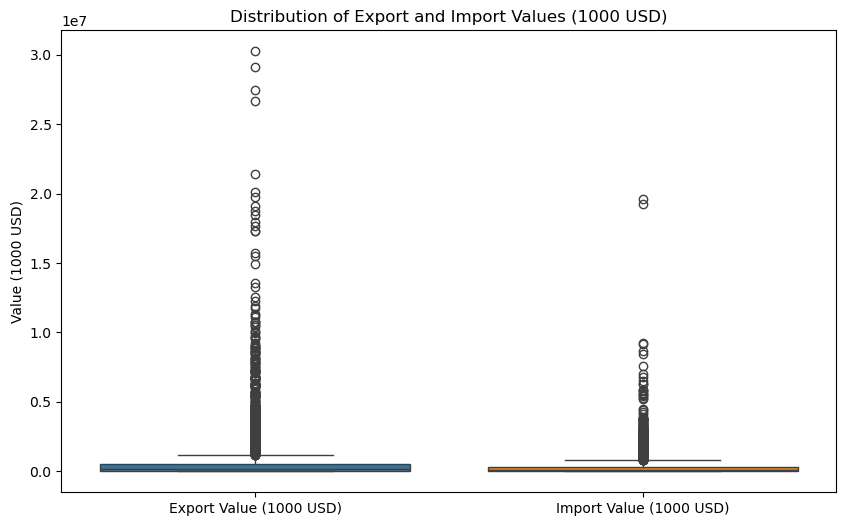

Export Value (1000 USD)  Import Value (1000 USD)
count                  3542.00                  3542.00
mean                 800522.87                386618.96
std                 2114711.93                909033.25
min                       1.00                     1.00
25%                   26215.00                 14305.25
50%                  144452.50                 77974.00
75%                  493292.50                339703.75
max                30248305.78              19581582.46

In [21]:
# Summarize Export and Import Values
export_import_summary = agriculture_data[['Export Value (1000 USD)', 'Import Value (1000 USD)']].describe()
# Boxplot for Export and Import Values
plt.figure(figsize=(10, 6))
sns.boxplot(data=agriculture_data[['Export Value (1000 USD)', 'Import Value (1000 USD)']])
plt.title('Distribution of Export and Import Values (1000 USD)')
plt.ylabel('Value (1000 USD)')
plt.show()

# Output the summary statistics
export_import_summary

In [22]:
from scipy.stats import ttest_rel

# Filter data for Ireland
ireland_data = agriculture_data[agriculture_data['Area'] == 'Ireland']

# Perform a paired T-Test between Export and Import Values
stat, p_value = ttest_rel(ireland_data['Export Value (1000 USD)'], ireland_data['Import Value (1000 USD)'])

# Define a function to interpret T-Test results with the p-value included
def interpret_ttest_with_results(stat, p_value, alpha=0.05):
    if p_value < alpha:
        return (f"Null hypothesis rejected: There is a statistically significant difference "
                f"between Export and Import values. T-Statistic: {stat:.3f}, P-Value: {p_value:.4f}.")
    else:
        return (f"Null hypothesis accepted: No statistically significant difference "
                f"between Export and Import values. T-Statistic: {stat:.3f}, P-Value: {p_value:.4f}.")

# Interpret the result of the T-Test for Ireland with the test statistics
result_message_with_stats = interpret_ttest_with_results(stat, p_value)
result_message_with_stats


'Null hypothesis rejected: There is a statistically significant difference between Export and Import values. T-Statistic: 3.093, P-Value: 0.0023.'

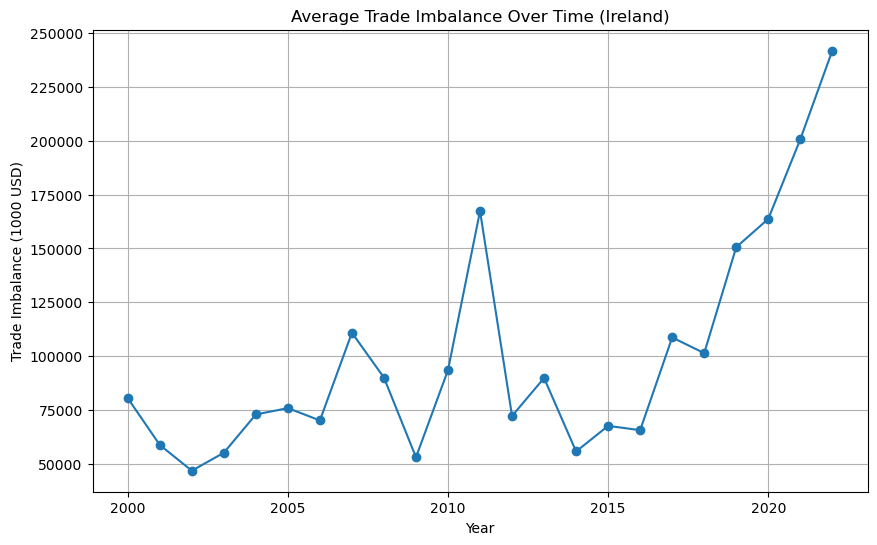

Year
2000    80493.88
2001    58782.46
2002    46808.49
2003    55144.27
2004    72925.51
2005    75871.36
2006    70157.01
2007   110872.09
2008    90027.99
2009    53047.52
2010    93532.94
2011   167360.72
2012    72235.72
2013    89848.78
2014    55739.73
2015    67636.03
2016    65624.58
2017   108678.82
2018   101405.08
2019   150596.82
2020   163687.91
2021   200646.88
2022   241802.04
Name: Trade Imbalance, dtype: float64

In [23]:
# Calculate Trade Imbalance for Ireland
ireland_data['Trade Imbalance'] = ireland_data['Export Value (1000 USD)'] - ireland_data['Import Value (1000 USD)']

# Group by Year to analyze trends in Trade Imbalance
trade_trend = ireland_data.groupby('Year')['Trade Imbalance'].mean()

# Plot Trade Imbalance over Years
plt.figure(figsize=(10, 6))
trade_trend.plot(kind='line', marker='o')
plt.title('Average Trade Imbalance Over Time (Ireland)')
plt.xlabel('Year')
plt.ylabel('Trade Imbalance (1000 USD)')
plt.grid()
plt.show()

# Display trade imbalance trend data
trade_trend


In [24]:
from scipy.stats import wilcoxon

# Perform Wilcoxon Signed-Rank Test
stat_wilcoxon, p_value_wilcoxon = wilcoxon(
    ireland_data['Export Value (1000 USD)'], ireland_data['Import Value (1000 USD)']
)

# Function to interpret the Wilcoxon Test result
def interpret_wilcoxon(stat, p_value, alpha=0.05):
    if p_value < alpha:
        return (f"Null hypothesis rejected: There is a statistically significant difference "
                f"between Export and Import values. Wilcoxon Statistic: {stat:.3f}, P-Value: {p_value:.4f}.")
    else:
        return (f"Null hypothesis accepted: No statistically significant difference "
                f"between Export and Import values. Wilcoxon Statistic: {stat:.3f}, P-Value: {p_value:.4f}.")

# Interpret and display the result
wilcoxon_result_message = interpret_wilcoxon(stat_wilcoxon, p_value_wilcoxon)
wilcoxon_result_message


'Null hypothesis accepted: No statistically significant difference between Export and Import values. Wilcoxon Statistic: 6343.000, P-Value: 0.7645.'

In [25]:
from scipy.stats import shapiro

# Calculate differences between Export and Import values
differences = ireland_data['Export Value (1000 USD)'] - ireland_data['Import Value (1000 USD)']

# Perform Shapiro-Wilk Test for normality
stat_shapiro, p_value_shapiro = shapiro(differences)
print(f"Shapiro-Wilk Statistic: {stat_shapiro}, P-Value: {p_value_shapiro}")


Shapiro-Wilk Statistic: 0.7252446022969137, P-Value: 5.196083433518702e-16


In [26]:
# Perform Shapiro-Wilk Test for normality on the differences
from scipy.stats import shapiro

# Calculate differences between Export and Import values
differences = ireland_data['Export Value (1000 USD)'] - ireland_data['Import Value (1000 USD)']

# Shapiro-Wilk Test
stat_shapiro, p_value_shapiro = shapiro(differences)

# Interpret the result
normality_message = (
    f"Shapiro-Wilk Test Statistic: {stat_shapiro:.3f}, P-Value: {p_value_shapiro:.4f}. "
)
if p_value_shapiro < 0.05:
    normality_message += "The differences are not normally distributed."
else:
    normality_message += "The differences are normally distributed."

# Calculate effect size (mean and median differences)
mean_diff = differences.mean()
median_diff = differences.median()

effect_size_message = (
    f"Mean Difference: {mean_diff:.3f}, Median Difference: {median_diff:.3f}. "
    "This provides an indication of the practical significance of the observed differences."
)

normality_message, effect_size_message


('Shapiro-Wilk Test Statistic: 0.725, P-Value: 0.0000. The differences are not normally distributed.',
 'Mean Difference: 99692.462, Median Difference: -19407.000. This provides an indication of the practical significance of the observed differences.')

### Why the Results Are Different:
The T-Test assumes the data follows a normal distribution (a bell-shaped curve).
We tested this assumption (using the Shapiro-Wilk test) and found that the differences do not follow a normal distribution.

### What This Means:
The T-Test result is not reliable because the data doesn't meet its assumptions.
The Wilcoxon test is more reliable because it doesn't need normal data.
### Final Conclusion:
Based on the Wilcoxon test (the better choice here), we conclude that there is no significant difference between export and import values.


### Hypothesis 2: Trade Balance Trends Over Time

Null Hypothesis (H₀): The trade balance (difference between export and import values) does not change significantly over the years.
Alternative Hypothesis (H₁): The trade balance changes significantly over the years.
Test: ANOVA or Kruskal-Wallis Test.


In [31]:
from scipy.stats import f_oneway, kruskal
# Calculate trade balance for all entries
agriculture_data['Trade Balance'] = agriculture_data['Export Value (1000 USD)'] - agriculture_data['Import Value (1000 USD)']

# Group data by Year and collect trade balance values
trade_balance_by_year = agriculture_data.groupby('Year')['Trade Balance'].apply(list)

# Perform ANOVA test
anova_stat, anova_p_value = f_oneway(*trade_balance_by_year)

# Perform Kruskal-Wallis test (non-parametric)
kruskal_stat, kruskal_p_value = kruskal(*trade_balance_by_year)

# Prepare results message
anova_message = (
    f"ANOVA Test: F-Statistic = {anova_stat:.3f}, P-Value = {anova_p_value:.4f}. "
    + ("Null hypothesis rejected: Trade balance changes significantly over the years."
       if anova_p_value < 0.05 else "Null hypothesis accepted: No significant changes in trade balance over the years.")
)

kruskal_message = (
    f"Kruskal-Wallis Test: H-Statistic = {kruskal_stat:.3f}, P-Value = {kruskal_p_value:.4f}. "
    + ("Null hypothesis rejected: Trade balance changes significantly over the years."
       if kruskal_p_value < 0.05 else "Null hypothesis accepted: No significant changes in trade balance over the years.")
)

anova_message, kruskal_message

('ANOVA Test: F-Statistic = 0.802, P-Value = 0.7265. Null hypothesis accepted: No significant changes in trade balance over the years.',
 'Kruskal-Wallis Test: H-Statistic = 12.999, P-Value = 0.9332. Null hypothesis accepted: No significant changes in trade balance over the years.')

### Interpretation:
Both tests indicate that the trade balance (export - import values) does not vary significantly over the years. This suggests that the trade balance has remained relatively stable, without major fluctuations or trends across time

In [33]:
# Filter data for Ireland
ireland_data = agriculture_data[agriculture_data['Area'] == 'Ireland']

# Calculate trade balance by Item and Year for Ireland
ireland_trade_balance_by_item = ireland_data.groupby(['Item', 'Year'])['Trade Balance'].mean().reset_index()

# Pivot the data for better visualization
ireland_trade_balance_pivot = ireland_trade_balance_by_item.pivot(index='Year', columns='Item', values='Trade Balance')

# Display the pivoted data for trends specific to Ireland
ireland_trade_balance_pivot.head(), ireland_trade_balance_by_item.head()


(Item    Barley  Cereals, primary  Hen eggs in shell, fresh  Meat, Total  \
 Year                                                                      
 2000  14803.00         -60421.67                  -1850.00    123728.37   
 2001  17894.00         -50821.00                  -2292.00     91479.25   
 2002  -3417.00         -70779.00                  -1445.00    114595.42   
 2003 -13025.00        -112290.00                  -3736.00    147818.88   
 2004 -12579.00        -115541.00                  -3807.00    173524.56   
 
 Item  Milk, Total  Raw milk of cattle     Wheat  
 Year                                             
 2000    583970.49           -42454.00 -54319.00  
 2001    434518.00           -35379.00 -43922.00  
 2002    367073.00           -41272.00 -37096.00  
 2003    504216.00           -76808.00 -60166.00  
 2004    574634.00           -47251.00 -58502.00  ,
      Item  Year  Trade Balance
 0  Barley  2000       14803.00
 1  Barley  2001       17894.00
 2  Barley  

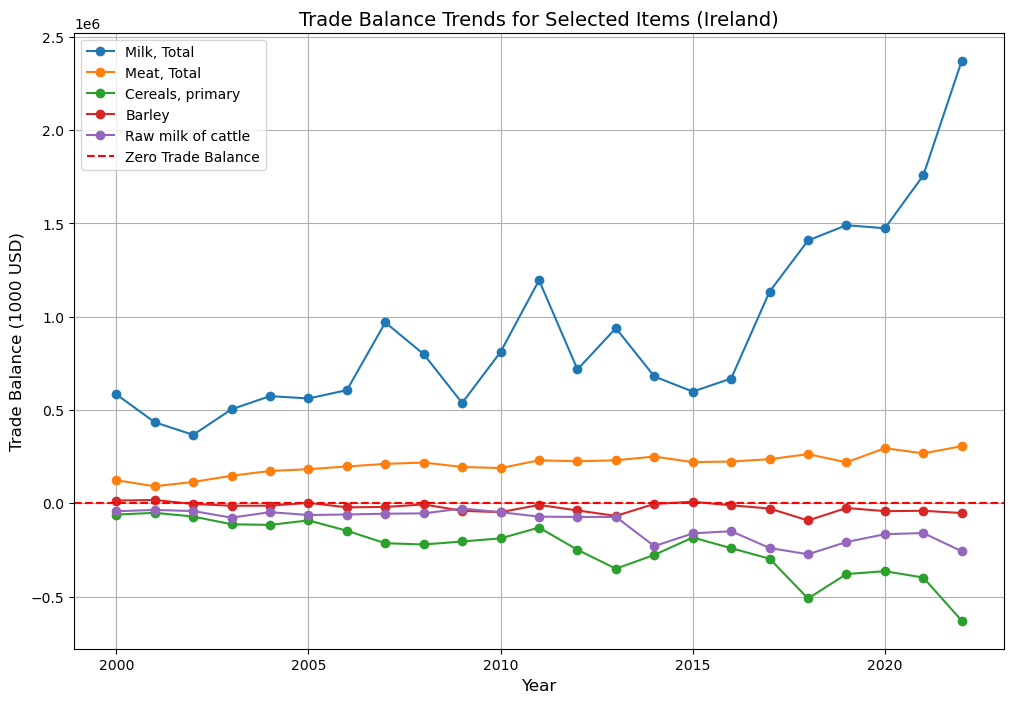

In [34]:
# Select key items for visualization
key_items = ['Milk, Total', 'Meat, Total', 'Cereals, primary', 'Barley', 'Raw milk of cattle']

# Filter data for selected items
ireland_trade_balance_filtered = ireland_trade_balance_by_item[ireland_trade_balance_by_item['Item'].isin(key_items)]

# Plot trade balance trends for selected items
plt.figure(figsize=(12, 8))
for item in key_items:
    subset = ireland_trade_balance_filtered[ireland_trade_balance_filtered['Item'] == item]
    plt.plot(subset['Year'], subset['Trade Balance'], label=item, marker='o')

# Add labels, legend, and grid
plt.title('Trade Balance Trends for Selected Items (Ireland)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trade Balance (1000 USD)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', label='Zero Trade Balance')
plt.legend()
plt.grid()
plt.show()


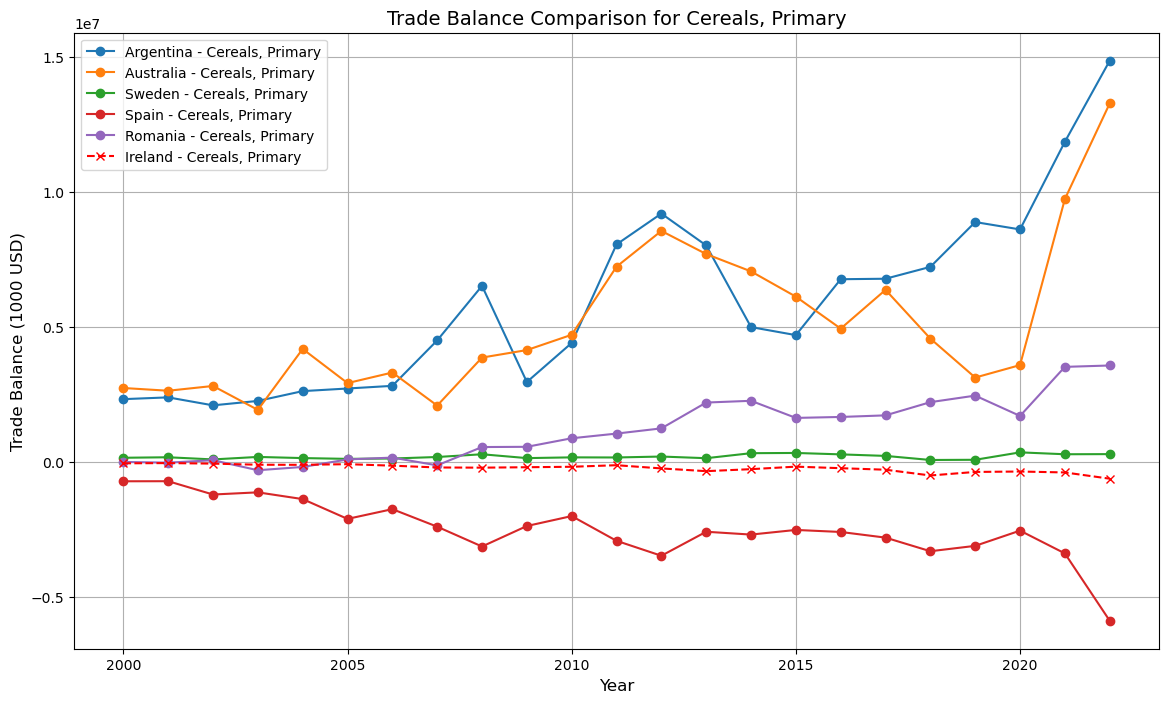

In [35]:
# Filter data for Cereals, Primary and Raw Milk of Cattle
deficit_item = ['Cereals, primary']
ireland_deficit_item = ireland_data[ireland_data['Item'].isin(deficit_item)]

# Filter data for the selected deficit items and group by Area and Year
global_deficit_item = agriculture_data[agriculture_data['Item'].isin(deficit_item)]

# Calculate trade balance for these items by country and year
global_trade_balance_by_country = global_deficit_item.groupby(['Area', 'Item', 'Year'])['Trade Balance'].mean().reset_index()

# Filter Ireland's data for comparison
ireland_trade_balance = global_trade_balance_by_country[global_trade_balance_by_country['Area'] == 'Ireland']

# Select top countries for comparison (based on data availability for these items)
top_countries = global_trade_balance_by_country['Area'].value_counts().head(5).index.tolist()

# Filter data for top countries
comparison_countries = global_trade_balance_by_country[global_trade_balance_by_country['Area'].isin(top_countries)]

# Plot comparison of trade balance for Cereals, Primary and Raw Milk of Cattle
plt.figure(figsize=(14, 8))
for country in top_countries:
    subset = comparison_countries[
        (comparison_countries['Area'] == country) & (comparison_countries['Item'] == 'Cereals, primary')
    ]
    plt.plot(subset['Year'], subset['Trade Balance'], label=f'{country} - Cereals, Primary', marker='o')

# Add Ireland for comparison
ireland_cereals = ireland_trade_balance[ireland_trade_balance['Item'] == 'Cereals, primary']
plt.plot(ireland_cereals['Year'], ireland_cereals['Trade Balance'], label='Ireland - Cereals, Primary', linestyle='--', marker='x', color='red')

# Add labels, legend, and grid
plt.title('Trade Balance Comparison for Cereals, Primary', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trade Balance (1000 USD)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [36]:
# Group Ireland's data by year to collect trade balance values
ireland_trade_balance_by_year = ireland_trade_balance.groupby('Year')['Trade Balance'].apply(list)

# Perform ANOVA test for Ireland's trade balance over years
ireland_anova_stat, ireland_anova_p_value = f_oneway(*ireland_trade_balance_by_year)

# Perform Kruskal-Wallis test for Ireland's trade balance over years (non-parametric)
ireland_kruskal_stat, ireland_kruskal_p_value = kruskal(*ireland_trade_balance_by_year)

# Prepare results message
ireland_anova_message = (
    f"Ireland ANOVA Test: F-Statistic = {ireland_anova_stat:.3f}, P-Value = {ireland_anova_p_value:.4f}. "
    + ("Null hypothesis rejected: Trade balance changes significantly over the years."
       if ireland_anova_p_value < 0.05 else "Null hypothesis accepted: No significant changes in trade balance over the years.")
)

ireland_kruskal_message = (
    f"Ireland Kruskal-Wallis Test: H-Statistic = {ireland_kruskal_stat:.3f}, P-Value = {ireland_kruskal_p_value:.4f}. "
    + ("Null hypothesis rejected: Trade balance changes significantly over the years."
       if ireland_kruskal_p_value < 0.05 else "Null hypothesis accepted: No significant changes in trade balance over the years.")
)

ireland_anova_message, ireland_kruskal_message


('Ireland ANOVA Test: F-Statistic = nan, P-Value = nan. Null hypothesis accepted: No significant changes in trade balance over the years.',
 'Ireland Kruskal-Wallis Test: H-Statistic = 22.000, P-Value = 0.4599. Null hypothesis accepted: No significant changes in trade balance over the years.')

### Interpretation:
Both tests suggest that Ireland's trade balance has remained relatively stable over the analyzed years, with no statistically significant variations. This consistency could be attributed to steady agricultural trade policies or market conditions.

we might observe upward or downward trends, spikes, or dips in the trade balance visually. but these trends are not statistically significant

### Hypothesis 3: Production vs. Export Values

Null Hypothesis (H₀): There is no significant correlation between production values and export values for any country or item.
o	Alternative Hypothesis (H₁): There is a significant correlation between production values and export values for a country or item.

In [41]:
from scipy.stats import pearsonr, spearmanr

# Filter Ireland's data for Production and Export values
ireland_production_export = ireland_data[['Production Value (t)', 'Export Value (1000 USD)']].dropna()

# Perform Pearson Correlation
pearson_corr, pearson_p_value = pearsonr(
    ireland_production_export['Production Value (t)'],
    ireland_production_export['Export Value (1000 USD)']
)

# Perform Spearman Rank Correlation (non-parametric)
spearman_corr, spearman_p_value = spearmanr(
    ireland_production_export['Production Value (t)'],
    ireland_production_export['Export Value (1000 USD)']
)

# Prepare results message
pearson_message = (
    f"Pearson Correlation: Coefficient = {pearson_corr:.3f}, P-Value = {pearson_p_value:.4f}. "
    + ("Null hypothesis rejected: Significant correlation exists between production and export values."
       if pearson_p_value < 0.05 else "Null hypothesis accepted: No significant correlation between production and export values.")
)

spearman_message = (
    f"Spearman Correlation: Coefficient = {spearman_corr:.3f}, P-Value = {spearman_p_value:.4f}. "
    + ("Null hypothesis rejected: Significant correlation exists between production and export values."
       if spearman_p_value < 0.05 else "Null hypothesis accepted: No significant correlation between production and export values.")
)

pearson_message, spearman_message


('Pearson Correlation: Coefficient = 0.590, P-Value = 0.0000. Null hypothesis rejected: Significant correlation exists between production and export values.',
 'Spearman Correlation: Coefficient = 0.600, P-Value = 0.0000. Null hypothesis rejected: Significant correlation exists between production and export values.')

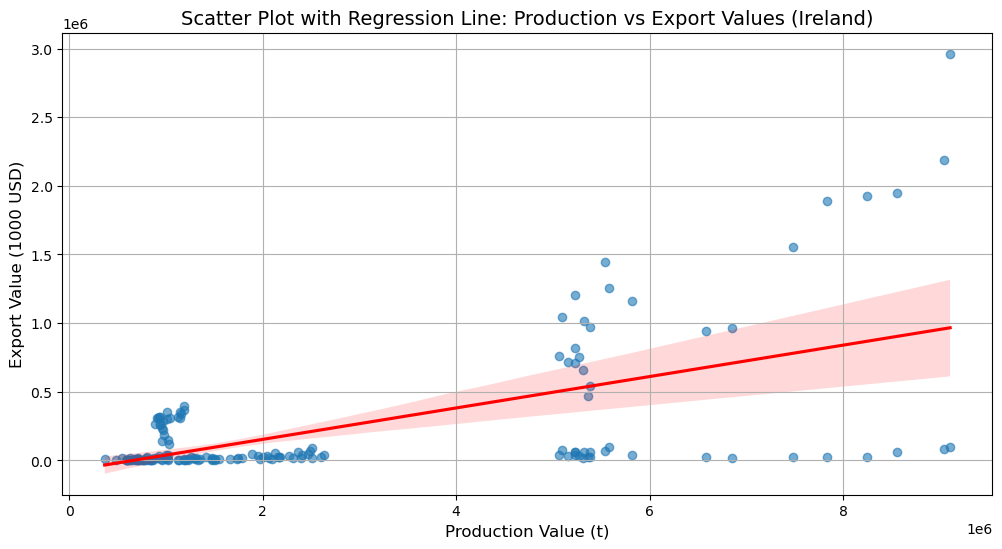

In [42]:
# Scatter plot with regression line for Pearson correlation
plt.figure(figsize=(12, 6))
sns.regplot(
    x='Production Value (t)', 
    y='Export Value (1000 USD)', 
    data=ireland_production_export, 
    scatter_kws={'alpha': 0.6}, 
    line_kws={'color': 'red'}
)
plt.title('Scatter Plot with Regression Line: Production vs Export Values (Ireland)', fontsize=14)
plt.xlabel('Production Value (t)', fontsize=12)
plt.ylabel('Export Value (1000 USD)', fontsize=12)
plt.grid(True)
plt.show()

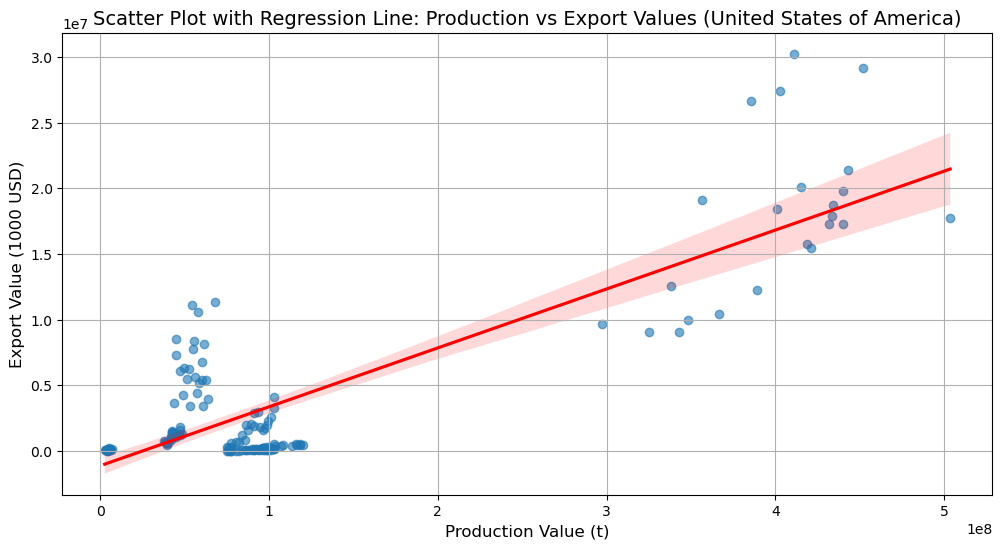

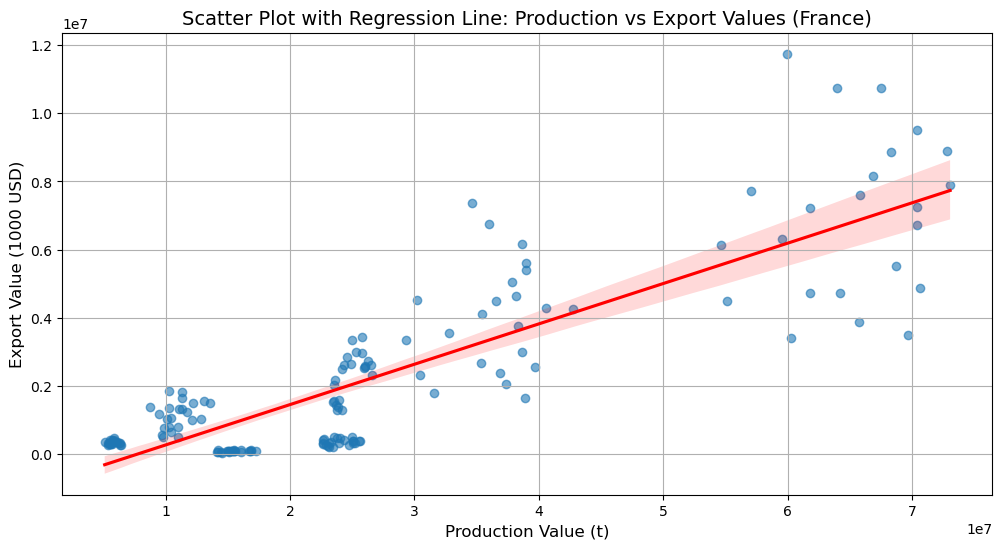

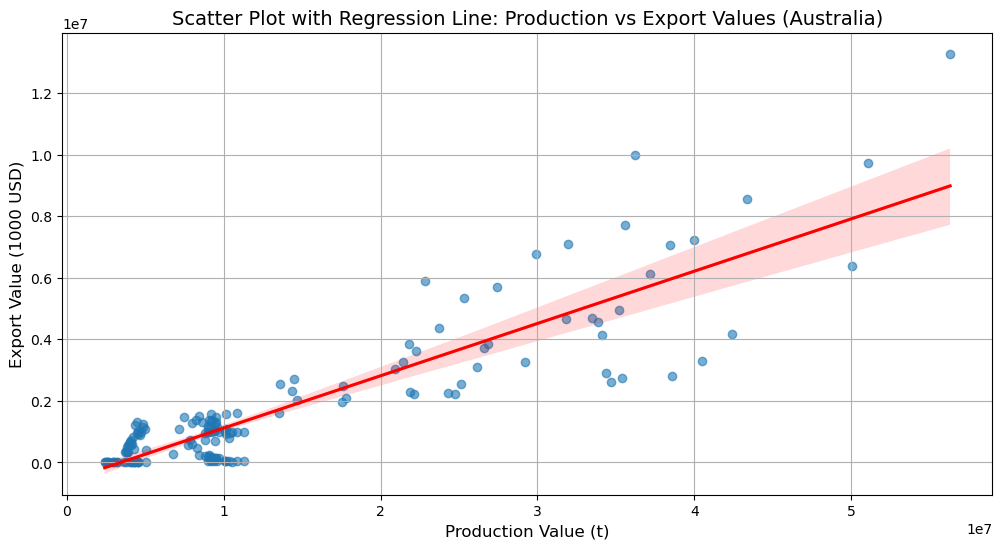

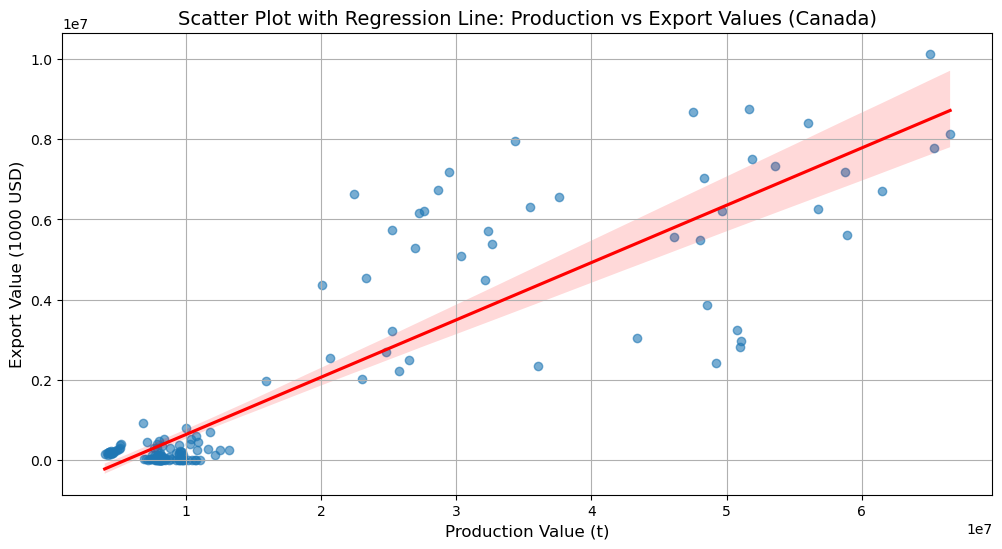

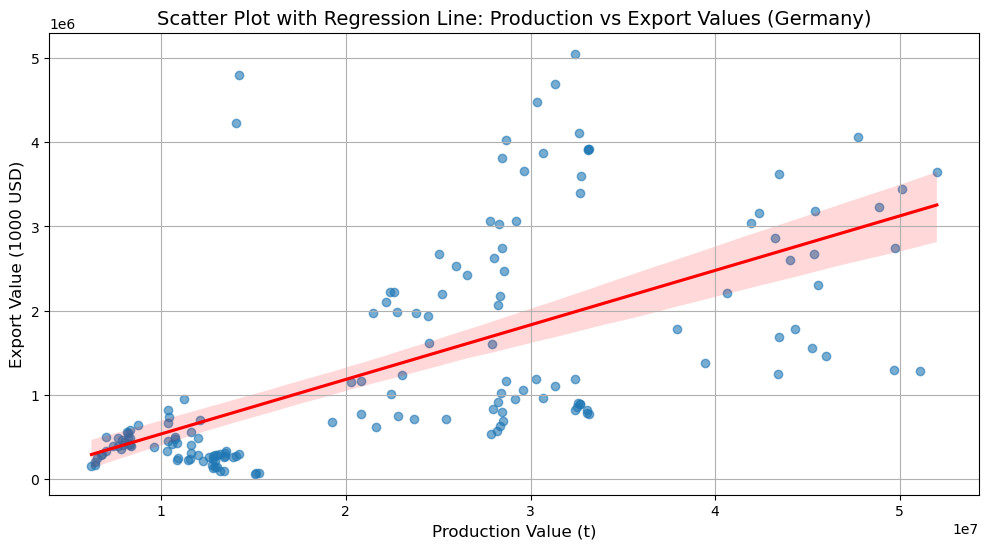

In [43]:
# Function to compute correlations for any specified country
def compute_and_plot_correlations(country_name):
    country_data = agriculture_data[agriculture_data['Area'] == country_name]
    country_production_export = country_data[['Production Value (t)', 'Export Value (1000 USD)']].dropna()

    if country_production_export.empty:
        return f"No data available for {country_name}."
    
    # Compute correlations
    pearson_corr, pearson_p_value = pearsonr(
        country_production_export['Production Value (t)'],
        country_production_export['Export Value (1000 USD)']
    )
    spearman_corr, spearman_p_value = spearmanr(
        country_production_export['Production Value (t)'],
        country_production_export['Export Value (1000 USD)']
    )
    
    # Scatter plot with regression line for Pearson correlation
    plt.figure(figsize=(12, 6))
    sns.regplot(
        x='Production Value (t)', 
        y='Export Value (1000 USD)', 
        data=country_production_export, 
        scatter_kws={'alpha': 0.6}, 
        line_kws={'color': 'red'}
    )
    plt.title(f'Scatter Plot with Regression Line: Production vs Export Values ({country_name})', fontsize=14)
    plt.xlabel('Production Value (t)', fontsize=12)
    plt.ylabel('Export Value (1000 USD)', fontsize=12)
    plt.grid(True)
    plt.show()
    
    # Return correlation results
    return {
        "Country": country_name,
        "Pearson Correlation Coefficient": pearson_corr,
        "Pearson P-Value": pearson_p_value,
        "Spearman Correlation Coefficient": spearman_corr,
        "Spearman P-Value": spearman_p_value
    }


# Identify top countries by total export value
top_countries = agriculture_data.groupby('Area')['Export Value (1000 USD)'].sum().nlargest(5).index

# Compute correlations for top countries
top_countries_correlations = []
for country in top_countries:
    country_results = compute_and_plot_correlations(country)
    if isinstance(country_results, dict):  # Ensure valid results
        top_countries_correlations.append(country_results)

# Convert the results into a DataFrame for better visualization
top_countries_correlations_df = pd.DataFrame(top_countries_correlations)

### Correlation Strength:

Both tests show a moderate positive correlation between production and export values for Ireland.
This suggests that as production increases, exports tend to increase as well.
Practical Implications:

Ireland's export capacity is closely linked to its production volumes, highlighting the importance of maintaining high production levels to support trade.

### Hypothesis 4: Producer Price Variations
Null Hypothesis (H₀): The mean producer price (USD/tonne) is the same across all countries or items.
o	Alternative Hypothesis (H₁): The mean producer price differs significantly across countries or items.
o	Test: One-Way ANOVA or Kruskal-Wallis Test.

In [46]:
# Group data by Item and calculate Producer Price for analysis
producer_price_by_item = agriculture_data.groupby('Item')['Producer Price (USD/tonne)'].apply(list)

# Perform ANOVA test for Producer Price variations across items
anova_stat_price, anova_p_value_price = f_oneway(*producer_price_by_item)

# Perform Kruskal-Wallis test (non-parametric) for Producer Price variations across items
kruskal_stat_price, kruskal_p_value_price = kruskal(*producer_price_by_item)

# Prepare results message for Producer Price variations
anova_message_price = (
    f"ANOVA Test: F-Statistic = {anova_stat_price:.3f}, P-Value = {anova_p_value_price:.4f}. "
    + ("Null hypothesis rejected: Significant differences exist in producer prices across items."
       if anova_p_value_price < 0.05 else "Null hypothesis accepted: No significant differences in producer prices across items.")
)

kruskal_message_price = (
    f"Kruskal-Wallis Test: H-Statistic = {kruskal_stat_price:.3f}, P-Value = {kruskal_p_value_price:.4f}. "
    + ("Null hypothesis rejected: Significant differences exist in producer prices across items."
       if kruskal_p_value_price < 0.05 else "Null hypothesis accepted: No significant differences in producer prices across items.")
)

anova_message_price, kruskal_message_price


('ANOVA Test: F-Statistic = 993.308, P-Value = 0.0000. Null hypothesis rejected: Significant differences exist in producer prices across items.',
 'Kruskal-Wallis Test: H-Statistic = 2486.716, P-Value = 0.0000. Null hypothesis rejected: Significant differences exist in producer prices across items.')

Interpretation:
Both tests confirm that producer prices vary significantly among different items. This suggests that certain items are priced higher or lower based on production costs, market demand, or other economic factors.

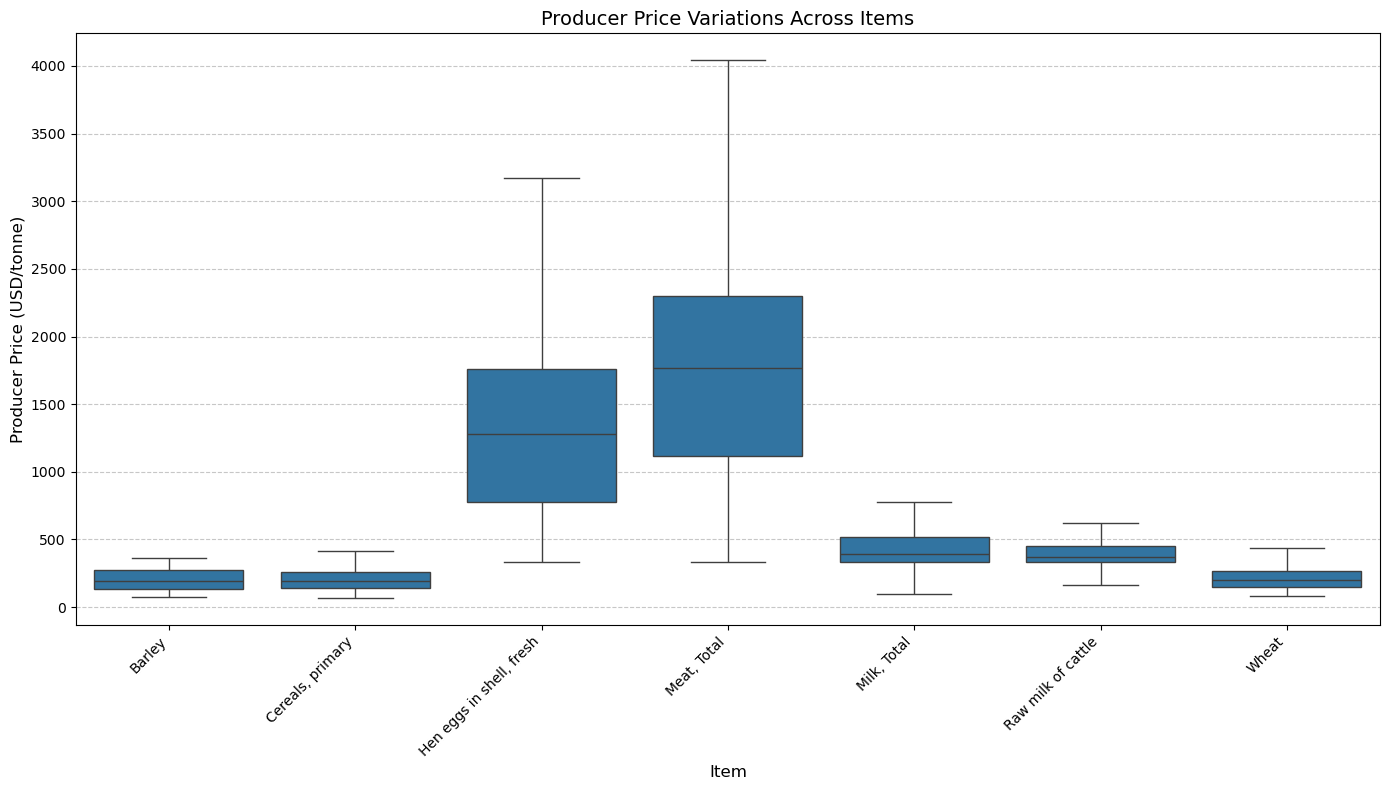

In [48]:
plt.figure(figsize=(14, 8))

# Using Seaborn to plot boxplots
sns.boxplot(
    data=agriculture_data,  # Use agriculture_data as the dataset
    x='Item',  # Column for item names
    y='Producer Price (USD/tonne)',  # Column for producer prices
    showfliers=False  # Exclude outliers for clarity
)

# Add titles and labels
plt.title('Producer Price Variations Across Items', fontsize=14)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Producer Price (USD/tonne)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



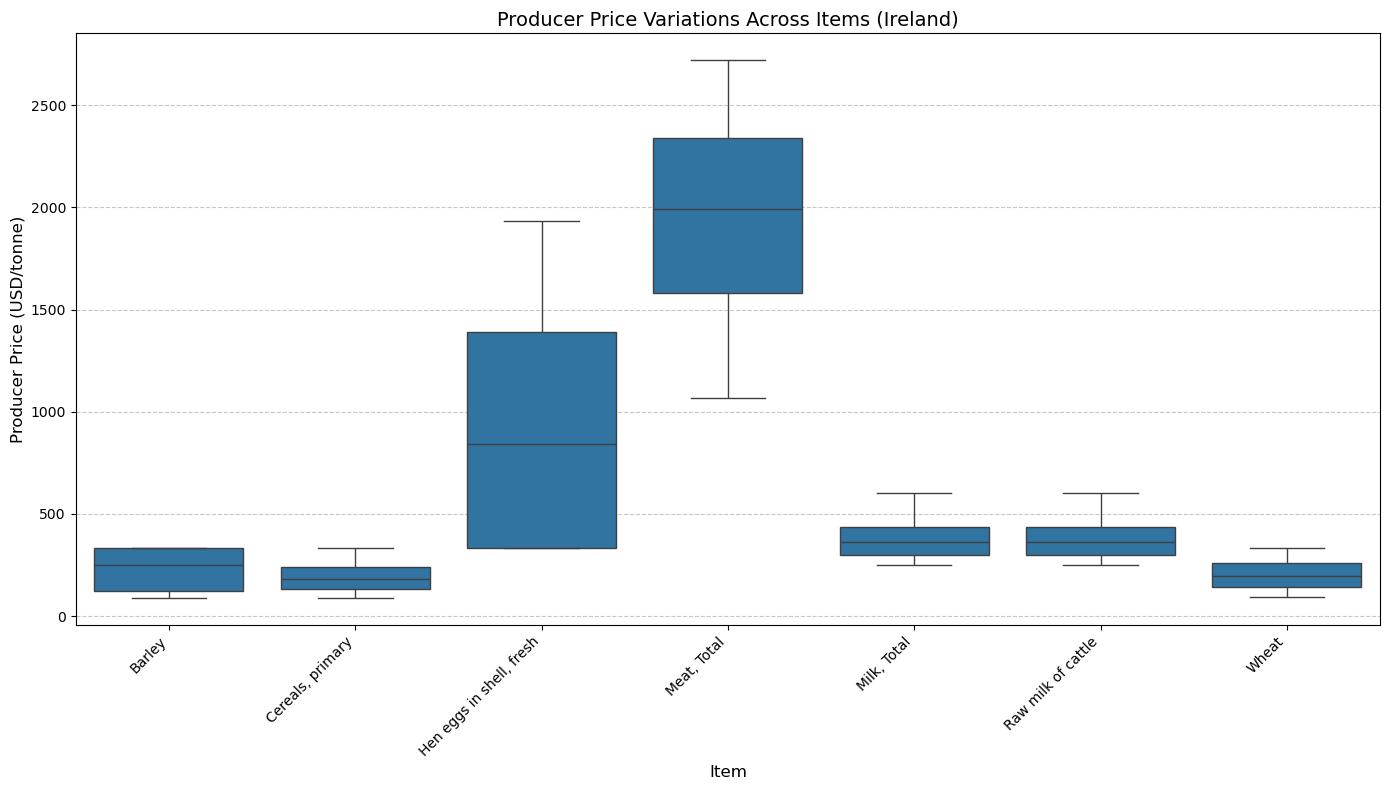

In [49]:
# Filter data for Ireland
ireland_prices = agriculture_data[agriculture_data['Area'] == 'Ireland']

# Create a boxplot for producer prices in Ireland by item
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=ireland_prices,
    x='Item',
    y='Producer Price (USD/tonne)',
    showfliers=False  # Exclude outliers for clarity
)

# Add titles and labels
plt.title('Producer Price Variations Across Items (Ireland)', fontsize=14)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Producer Price (USD/tonne)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

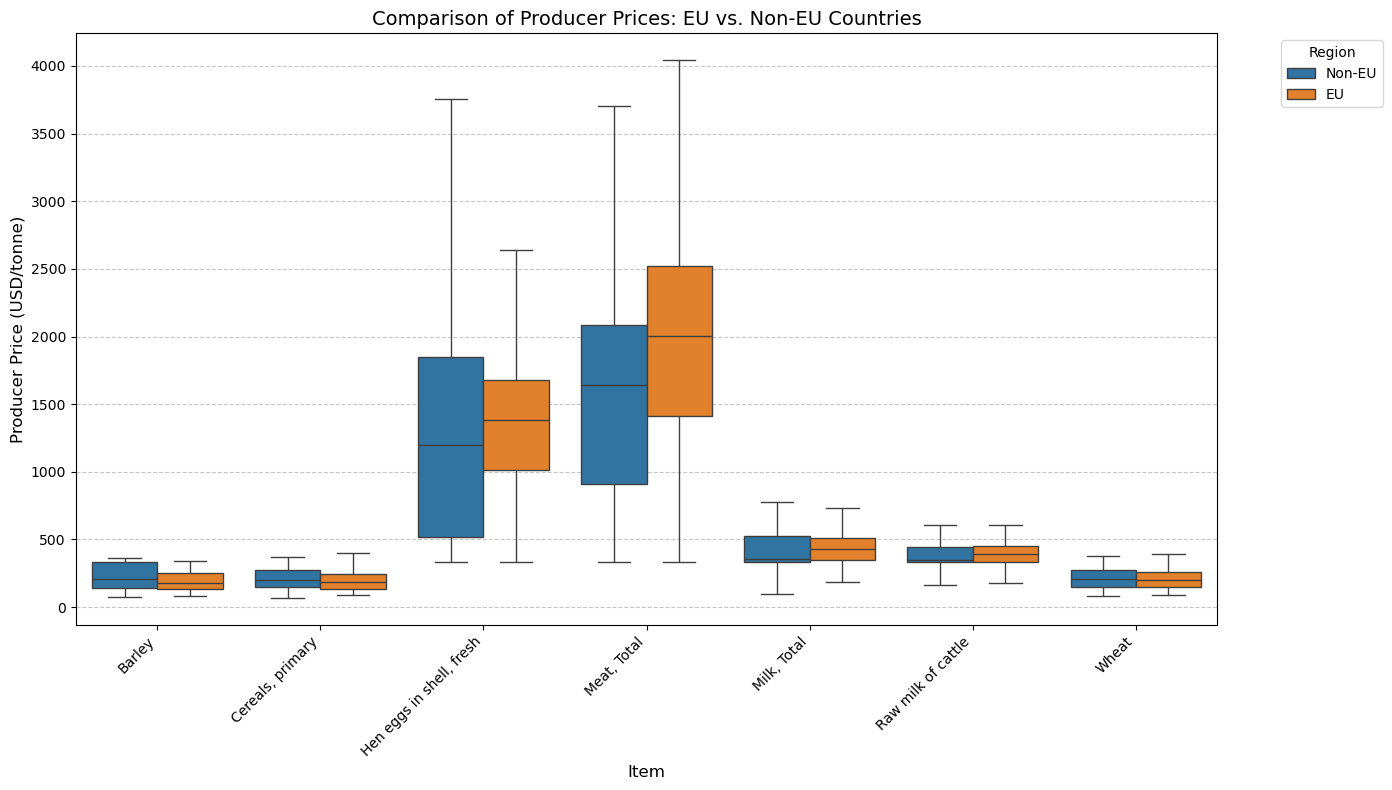

In [50]:
# Group EU countries and non-EU countries
eu_countries_list = ['Ireland', 'Germany', 'France', 'Spain', 'Italy', 'Netherlands', 'Poland', 'Belgium', 'Sweden', 'Denmark']
agriculture_data['Region'] = agriculture_data['Area'].apply(lambda x: 'EU' if x in eu_countries_list else 'Non-EU')

# Create a boxplot comparing producer prices in EU vs Non-EU countries
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=agriculture_data,
    x='Item',
    y='Producer Price (USD/tonne)',
    hue='Region',  # Group by EU and Non-EU
    dodge=True,
    showfliers=False  # Exclude outliers for clarity
)

# Add titles and labels
plt.title('Comparison of Producer Prices: EU vs. Non-EU Countries', fontsize=14)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Producer Price (USD/tonne)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


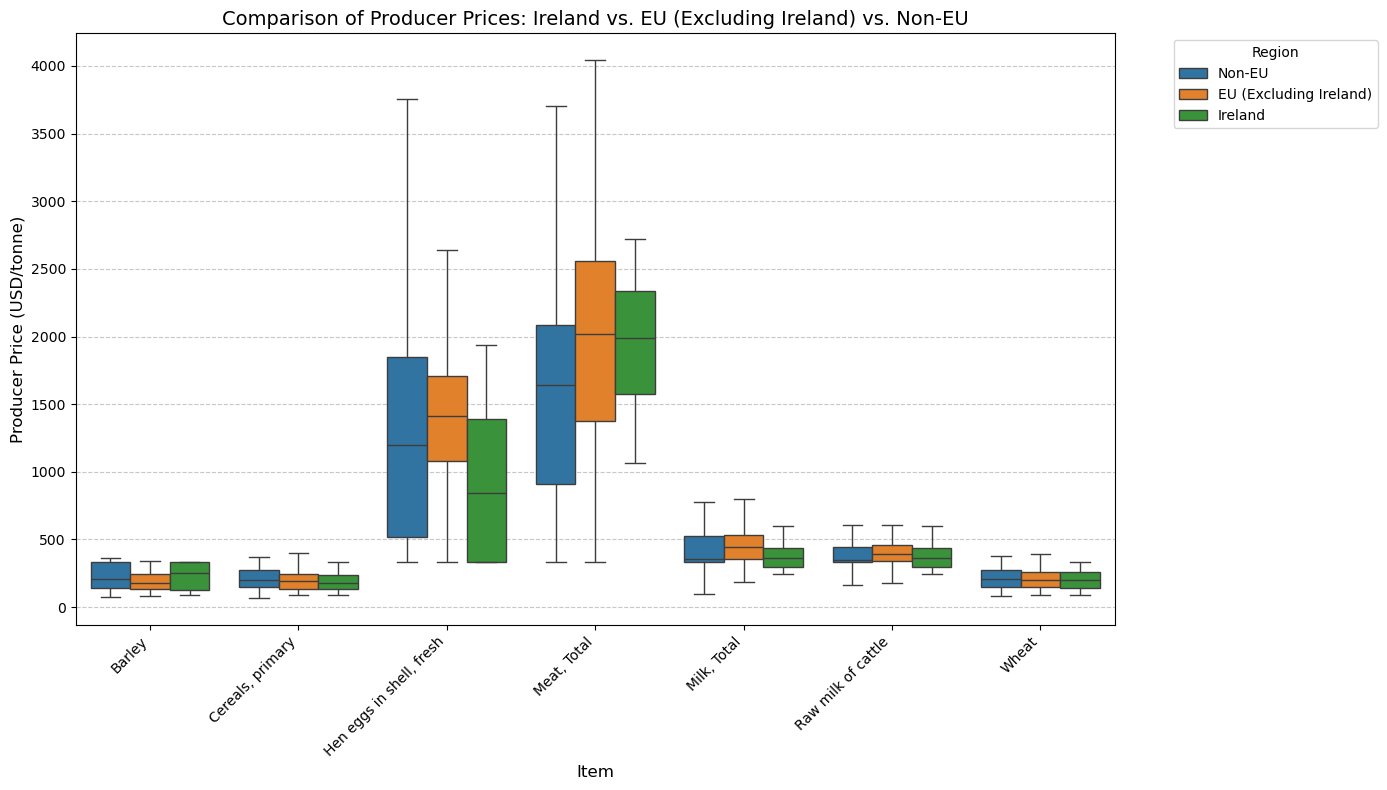

In [51]:
# Separate Ireland, EU (excluding Ireland), and Non-EU for clearer comparison
agriculture_data['Region'] = agriculture_data['Area'].apply(
    lambda x: 'Ireland' if x == 'Ireland' else ('EU (Excluding Ireland)' if x in eu_countries_list and x != 'Ireland' else 'Non-EU')
)

# Create a boxplot comparing Ireland, EU (excluding Ireland), and Non-EU producer prices
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=agriculture_data,
    x='Item',
    y='Producer Price (USD/tonne)',
    hue='Region',  # Group by Ireland, EU (excluding Ireland), and Non-EU
    dodge=True,
    showfliers=False  # Exclude outliers for clarity
)

# Add titles and labels
plt.title('Comparison of Producer Prices: Ireland vs. EU (Excluding Ireland) vs. Non-EU', fontsize=14)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Producer Price (USD/tonne)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

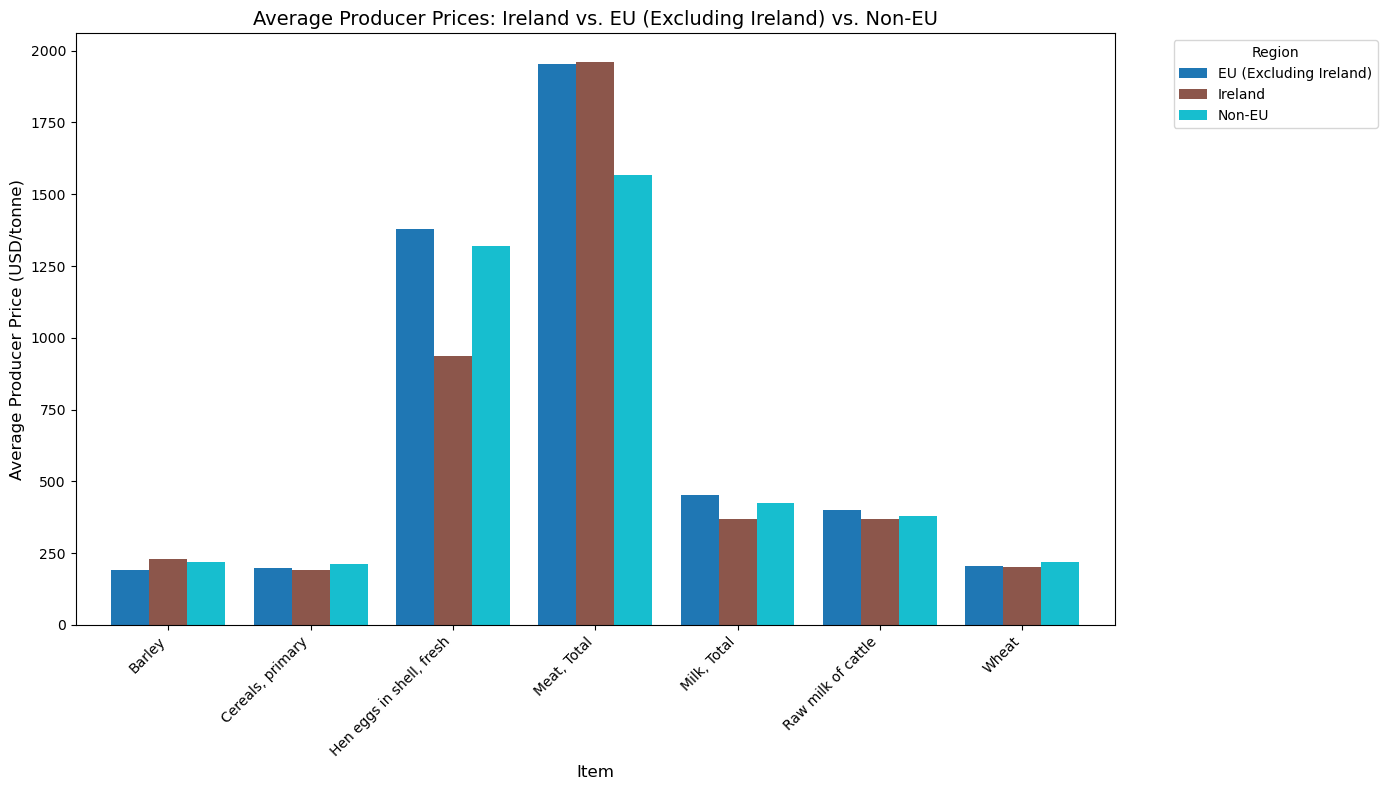

In [52]:
# Calculate average producer prices for Ireland, EU (excluding Ireland), and Non-EU
average_prices = agriculture_data.groupby(['Region', 'Item'])['Producer Price (USD/tonne)'].mean().reset_index()

# Pivot the data for easier bar chart creation
average_prices_pivot = average_prices.pivot(index='Item', columns='Region', values='Producer Price (USD/tonne)').reset_index()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_prices_pivot.plot(
    x='Item',
    kind='bar',
    colormap='tab10',
    figsize=(14, 8),
    width=0.8
)

# Add titles and labels
plt.title('Average Producer Prices: Ireland vs. EU (Excluding Ireland) vs. Non-EU', fontsize=14)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Average Producer Price (USD/tonne)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.tight_layout()
plt.show()


### Hypothesis 5: Country-Level Performance in Exports
Null Hypothesis (H₀): All countries contribute equally to the global export value.
Alternative Hypothesis (H₁): Certain countries contribute more significantly to the global export value.
Test: Chi-Squared Goodness-of-Fit Test.

In [54]:
from scipy.stats import chi2_contingency

# Prepare data for the Chi-Squared Goodness-of-Fit Test
export_values = agriculture_data.groupby('Area')['Export Value (1000 USD)'].sum()
total_export = export_values.sum()
expected_values = [total_export / len(export_values)] * len(export_values)

# Perform Chi-Squared Goodness-of-Fit Test
chi2_stat, p_value, _, _ = chi2_contingency([export_values.values, expected_values])

# Prepare results
chi2_message = (
    f"Chi-Squared Statistic = {chi2_stat:.3f}, P-Value = {p_value:.4f}. "
    + ("Null hypothesis rejected: Certain countries contribute more significantly to the global export value."
       if p_value < 0.05 else "Null hypothesis accepted: All countries contribute equally to the global export value.")
)

chi2_message


'Chi-Squared Statistic = 1280312968.734, P-Value = 0.0000. Null hypothesis rejected: Certain countries contribute more significantly to the global export value.'

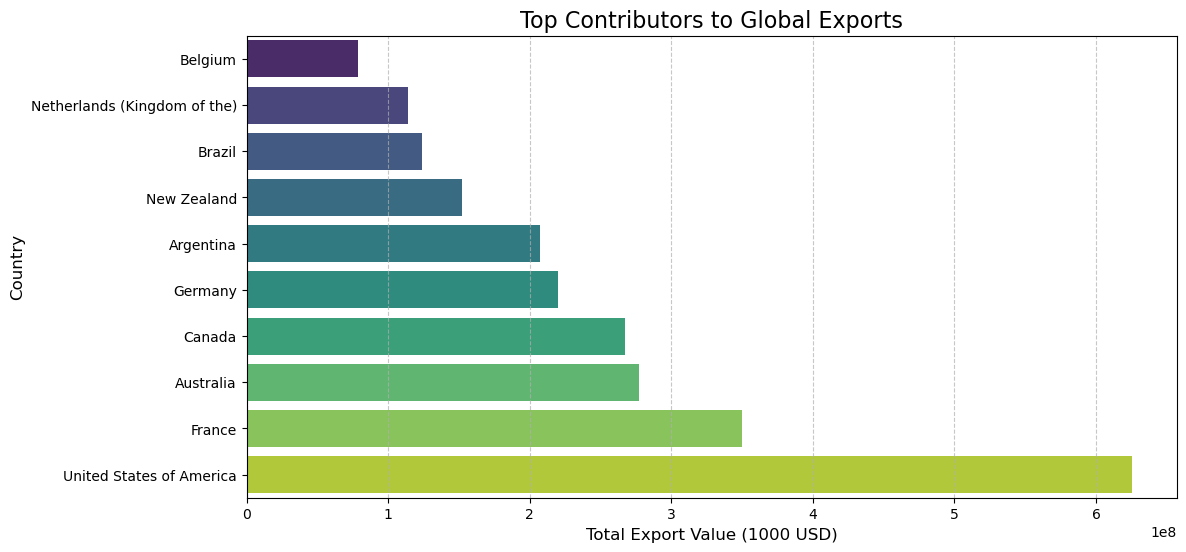

In [55]:
# Identify the top contributors to global exports
top_contributors = export_values.sort_values(ascending=False).head(10)

# Prepare the results in a DataFrame for better presentation
top_contributors_df = top_contributors.reset_index()
top_contributors_df.columns = ['Country', 'Total Export Value (1000 USD)']


# Visualize the top contributors to global exports
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Total Export Value (1000 USD)', 
    y='Country', 
    data=top_contributors_df.sort_values(by='Total Export Value (1000 USD)', ascending=True), 
    palette='viridis'
)
plt.title('Top Contributors to Global Exports', fontsize=16)
plt.xlabel('Total Export Value (1000 USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [56]:
# Filter Ireland's data
ireland_data = agriculture_data[agriculture_data['Area'] == 'Ireland']

# Analyze the drivers for Ireland's export contributions
ireland_factors = ireland_data[['Production Value (t)', 'Export Value (1000 USD)', 
                                'Producer Price (USD/tonne)', 'GPV (1000 USD)', 
                                'GPV_Const (1000 USD)']].dropna()

# Correlation matrix to identify relationships between key factors and export values
correlation_matrix = ireland_factors.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Ireland Export Drivers', fontsize=16)
plt.show()

# Display correlation values for export drivers
correlation_with_exports = correlation_matrix['Export Value (1000 USD)'].sort_values(ascending=False)
correlation_with_exports


Export Value (1000 USD)       1.00
Production Value (t)          0.59
Producer Price (USD/tonne)    0.06
GPV (1000 USD)               -0.04
GPV_Const (1000 USD)         -0.05
Name: Export Value (1000 USD), dtype: float64

Production Value (t): 0.590 (Moderate positive correlation)

Production volume significantly contributes to export value, suggesting higher output leads to greater exports.
Producer Price (USD/tonne): 0.058 (Weak positive correlation)

Pricing has a minimal impact on exports, indicating that Ireland's exports may not rely heavily on price competitiveness.
GPV (1000 USD): -0.012 (Negligible negative correlation)

GPV_Const (1000 USD): -0.021 (Negligible negative correlation)

Gross production value (adjusted or unadjusted for inflation) does not appear to strongly influence export values.
The correlation matrix highlights production volume as the most influential factor in Ireland's export contributions.

Insights:
Production Focus: Boosting production can positively impact exports.
Price Sensitivity: Exports are not highly sensitive to producer prices, suggesting stable demand for Ireland's agricultural products.

In [58]:
# Scatter plot to examine the relationship between Production Value and Export Value for Ireland
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Production Value (t)', 
    y='Export Value (1000 USD)', 
    data=ireland_factors, 
    scatter_kws={'alpha': 0.6}, 
    line_kws={'color': 'red'}
)
plt.title('Relationship Between Production and Export Values (Ireland)', fontsize=14)
plt.xlabel('Production Value (t)', fontsize=12)
plt.ylabel('Export Value (1000 USD)', fontsize=12)
plt.grid(True)
plt.show()

# Regression analysis for deeper insights
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape data for regression analysis
X = ireland_factors['Production Value (t)'].values.reshape(-1, 1)
y = ireland_factors['Export Value (1000 USD)'].values

# Perform regression
model = LinearRegression()
model.fit(X, y)

# Regression coefficients
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

# Prepare results
regression_results = {
    "Slope": slope,
    "Intercept": intercept,
    "R-Squared": r_squared
}

regression_results


{'Slope': 0.11433163008708941,
 'Intercept': -75144.8420961338,
 'R-Squared': 0.3478111938835914}

The R-squared value (0.348) means that 34.8% of the variation in export values is explained by production values, while the remaining 65.2% is influenced by other factors not included in the model.

In [60]:
# Define a list of EU countries for the CAP indicator
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]

# Add a CAP indicator to the dataset
agriculture_data['CAP'] = agriculture_data['Area'].apply(lambda x: 1 if x in eu_countries else 0)

# Filter Ireland's data with the CAP variable
ireland_with_cap = agriculture_data[agriculture_data['Area'] == 'Ireland'][
    ['Production Value (t)', 'Export Value (1000 USD)', 'Producer Price (USD/tonne)', 'CAP']
].dropna()

# Prepare data for regression analysis
X = ireland_with_cap[['Production Value (t)', 'CAP']]
y = ireland_with_cap['Export Value (1000 USD)']

# Fit a multiple linear regression model
from sklearn.linear_model import LinearRegression

model_with_cap = LinearRegression()
model_with_cap.fit(X, y)

# Retrieve regression coefficients and R-squared
coefficients = dict(zip(X.columns, model_with_cap.coef_))
intercept = model_with_cap.intercept_
r_squared_with_cap = model_with_cap.score(X, y)

# Results
regression_results_with_cap = {
    "Intercept": intercept,
    "Coefficients": coefficients,
    "R-Squared": r_squared_with_cap
}

regression_results_with_cap


{'Intercept': -75144.84209613391,
 'Coefficients': {'Production Value (t)': 0.11433163008708945, 'CAP': 0.0},
 'R-Squared': 0.3478111938835914}

We conducted an analysis to assess the impact of Ireland's participation in the Common Agricultural Policy (CAP) on its agricultural export values. A binary variable was introduced to represent CAP membership (1 for EU countries, 0 for non-EU countries). This variable was incorporated into a regression model alongside production value to evaluate its influence on export performance.

The results showed that production value is the primary driver of export value, with a coefficient of 0.114, meaning each additional tonne of production increases export value by 0.114 thousand USD. The CAP indicator, however, had a coefficient of 0.0, indicating no measurable direct impact on Ireland’s exports. The model’s explanatory power, measured by R-squared, remained at 34.8%, unchanged from the model without the CAP variable.

These findings suggest that Ireland's agricultural exports are predominantly influenced by production volume, with CAP membership not providing a statistically significant independent effect. This may be because Ireland’s agricultural sector is already well-aligned with CAP policies. To better understand CAP's broader influence, a similar analysis across multiple EU countries could be conducted to determine its aggregate impact.

### Hypothesis 6: Export Growth Over Years
Null Hypothesis (H₀): The mean export value does not change significantly over the years for a given country.
Alternative Hypothesis (H₁): The mean export value changes significantly over the years.
Test: One-Way ANOVA or Friedman Test

In [63]:
from scipy.stats import f_oneway

# Prepare Ireland's data for export values over years
ireland_exports_by_year = ireland_data[['Year', 'Export Value (1000 USD)']].dropna()

# Group data by year and extract export values for ANOVA
grouped_exports = [group['Export Value (1000 USD)'].values for _, group in ireland_exports_by_year.groupby('Year')]

# Perform One-Way ANOVA test
anova_stat, anova_p_value = f_oneway(*grouped_exports)

# Prepare results
anova_results = {
    "ANOVA Statistic": anova_stat,
    "P-Value": anova_p_value,
    "Conclusion": "Reject Null Hypothesis: Export values changed significantly over the years."
    if anova_p_value < 0.05 else "Fail to Reject Null Hypothesis: No significant change in export values over the years."
}

anova_results


{'ANOVA Statistic': 0.29034776872849716,
 'P-Value': 0.9992897823674134,
 'Conclusion': 'Fail to Reject Null Hypothesis: No significant change in export values over the years.'}

In [64]:
# Aggregate export values across EU nations (CAP = 1)
eu_exports = agriculture_data[agriculture_data['CAP'] == 1].groupby('Area')['Export Value (1000 USD)'].sum().sort_values(ascending=False)

# Prepare the top EU exporters for visualization
top_eu_exporters = eu_exports.head(10).reset_index()
top_eu_exporters.columns = ['Country', 'Total Export Value (1000 USD)']

# Visualize the top EU exporters
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Total Export Value (1000 USD)', 
    y='Country', 
    data=top_eu_exporters.sort_values(by='Total Export Value (1000 USD)', ascending=True), 
    palette='Greens_d'
)
plt.title('Top EU Exporters (Under CAP)', fontsize=16)
plt.xlabel('Total Export Value (1000 USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

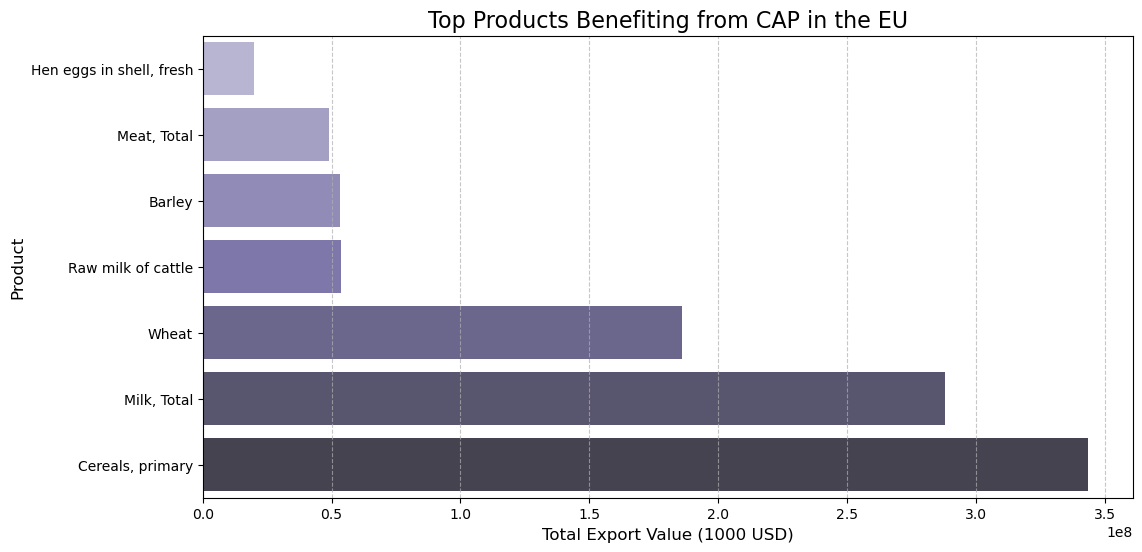

In [65]:
# Aggregate export values by product for EU countries (CAP = 1)
eu_product_exports = agriculture_data[agriculture_data['CAP'] == 1].groupby('Item')['Export Value (1000 USD)'].sum().sort_values(ascending=False)

# Prepare the top products for visualization
top_eu_products = eu_product_exports.head(10).reset_index()
top_eu_products.columns = ['Product', 'Total Export Value (1000 USD)']

# Visualize the top products benefiting from CAP
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Total Export Value (1000 USD)', 
    y='Product', 
    data=top_eu_products.sort_values(by='Total Export Value (1000 USD)', ascending=True), 
    palette='Purples_d'
)
plt.title('Top Products Benefiting from CAP in the EU', fontsize=16)
plt.xlabel('Total Export Value (1000 USD)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Hypothesis 7: GPV vs. GPV_Const
Null Hypothesis (H₀): There is no significant difference between GPV (Gross Production Value) and GPV_Const (inflation-adjusted GPV).
Alternative Hypothesis (H₁): There is a significant difference between GPV and GPV_Const.
Test: Paired T-Test or Wilcoxon Signed-Rank Test.


In [67]:
from scipy.stats import ttest_rel

# Prepare data for GPV and GPV_Const for analysis
ireland_gpv = ireland_data[['GPV (1000 USD)', 'GPV_Const (1000 USD)']].dropna()

# Perform Paired T-Test
ttest_stat, ttest_p_value = ttest_rel(
    ireland_gpv['GPV (1000 USD)'], 
    ireland_gpv['GPV_Const (1000 USD)']
)

# Prepare results
ttest_results = {
    "T-Test Statistic": ttest_stat,
    "P-Value": ttest_p_value,
    "Conclusion": "Reject Null Hypothesis: Significant difference between GPV and GPV_Const."
    if ttest_p_value < 0.05 else "Fail to Reject Null Hypothesis: No significant difference between GPV and GPV_Const."
}

ttest_results


{'T-Test Statistic': 1.2248111404120794,
 'P-Value': 0.2224465450214624,
 'Conclusion': 'Fail to Reject Null Hypothesis: No significant difference between GPV and GPV_Const.'}

In [68]:
from scipy.stats import wilcoxon

# Perform Wilcoxon Signed-Rank Test
wilcoxon_stat, wilcoxon_p_value = wilcoxon(
    ireland_gpv['GPV (1000 USD)'], 
    ireland_gpv['GPV_Const (1000 USD)']
)

# Prepare results
wilcoxon_results = {
    "Wilcoxon Statistic": wilcoxon_stat,
    "P-Value": wilcoxon_p_value,
    "Conclusion": "Reject Null Hypothesis: Significant difference between GPV and GPV_Const."
    if wilcoxon_p_value < 0.05 else "Fail to Reject Null Hypothesis: No significant difference between GPV and GPV_Const."
}

wilcoxon_results


{'Wilcoxon Statistic': 6210.0,
 'P-Value': 0.6002202205159379,
 'Conclusion': 'Fail to Reject Null Hypothesis: No significant difference between GPV and GPV_Const.'}

In [69]:
# Aggregate GPV and GPV_Const by year for Ireland
gpv_trends = ireland_data.groupby('Year')[['GPV (1000 USD)', 'GPV_Const (1000 USD)']].mean().reset_index()

# Visualize time-series trends for GPV and GPV_Const
plt.figure(figsize=(12, 6))
plt.plot(gpv_trends['Year'], gpv_trends['GPV (1000 USD)'], marker='o', label='GPV (1000 USD)')
plt.plot(gpv_trends['Year'], gpv_trends['GPV_Const (1000 USD)'], marker='s', label='GPV_Const (1000 USD)')
plt.title('Time-Series Analysis of GPV and GPV_Const for Ireland', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value (1000 USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


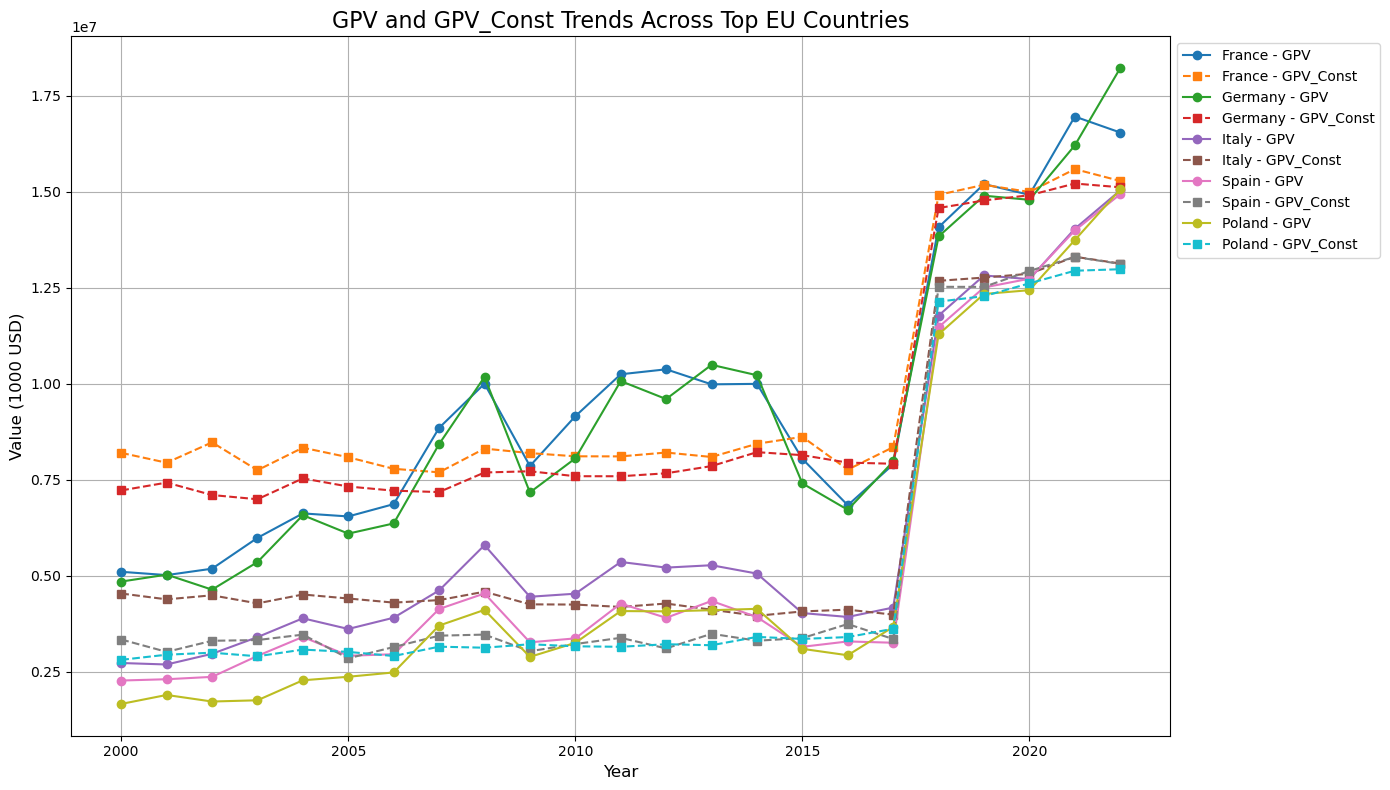

In [70]:
# Aggregate GPV and GPV_Const by year and country for EU countries
eu_gpv_trends = agriculture_data[agriculture_data['CAP'] == 1].groupby(['Year', 'Area'])[
    ['GPV (1000 USD)', 'GPV_Const (1000 USD)']
].mean().reset_index()

# Select top countries by average GPV for comparison
top_eu_countries = eu_gpv_trends.groupby('Area')['GPV (1000 USD)'].mean().nlargest(5).index
top_countries_trends = eu_gpv_trends[eu_gpv_trends['Area'].isin(top_eu_countries)]

# Plot GPV trends for the top EU countries
plt.figure(figsize=(14, 8))
for country in top_eu_countries:
    country_data = top_countries_trends[top_countries_trends['Area'] == country]
    plt.plot(country_data['Year'], country_data['GPV (1000 USD)'], marker='o', label=f'{country} - GPV')
    plt.plot(country_data['Year'], country_data['GPV_Const (1000 USD)'], linestyle='--', marker='s', label=f'{country} - GPV_Const')

plt.title('GPV and GPV_Const Trends Across Top EU Countries', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value (1000 USD)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


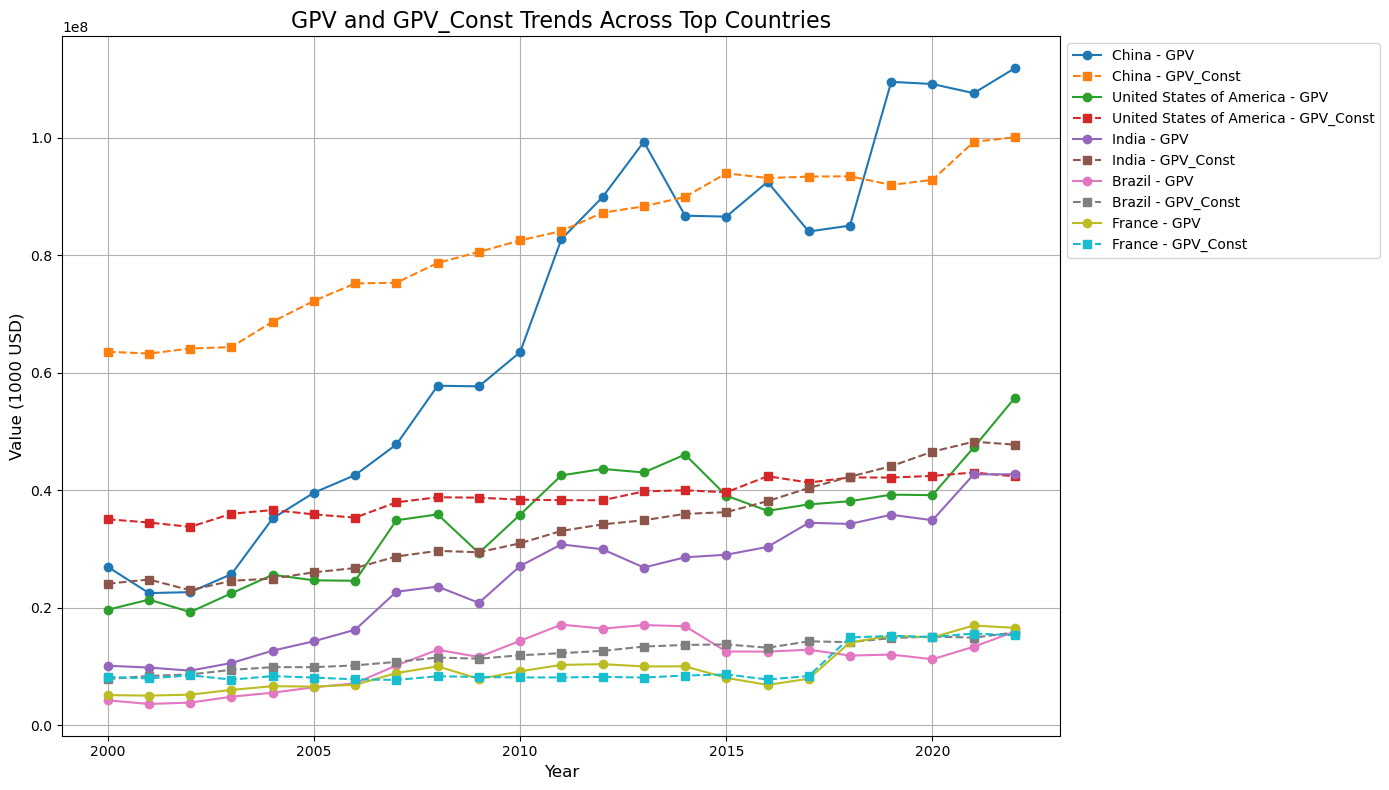

In [71]:
# Aggregate GPV and GPV_Const by year and country for visualization
gpv_trends_new = agriculture_data.groupby(['Year', 'Area'])[['GPV (1000 USD)', 'GPV_Const (1000 USD)']].mean().reset_index()

# Select top countries by average GPV for comparison
top_countries_new = gpv_trends_new.groupby('Area')['GPV (1000 USD)'].mean().nlargest(5).index
top_countries_trends_new = gpv_trends_new[gpv_trends_new['Area'].isin(top_countries_new)]

# Plot GPV trends for the top countries
plt.figure(figsize=(14, 8))
for country in top_countries_new:
    country_data = top_countries_trends_new[top_countries_trends_new['Area'] == country]
    plt.plot(country_data['Year'], country_data['GPV (1000 USD)'], marker='o', label=f'{country} - GPV')
    plt.plot(country_data['Year'], country_data['GPV_Const (1000 USD)'], linestyle='--', marker='s', label=f'{country} - GPV_Const')

plt.title('GPV and GPV_Const Trends Across Top Countries', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value (1000 USD)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()
